<a href="https://www.kaggle.com/code/fethullahceviz/so-2018-salary-prediction?scriptVersionId=107625458" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project Flow

---

1. Importing dataset and exploration

2. Exploratory Data Analysis

> 2.1. Numeric Datas

> 2.2. Ordinal Datas

> 2.3. Nominal Datas

3. Outlier Detection
  
> 3.1. Z Score

> 3.2. IQR Method

> 3.3. Outlier 

4. Missing Value Imputation

5. Feature Engineering

>5.1. Language Worked With Salary

>5.2. Developer Type With Salary

6. Feature Selection

7. First Result

8. Model Tuning

9. Result

---



# 1. Importing Dataset and Exploration

In [1]:
import numpy as np  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
import missingno as msno
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly import tools
from pathlib import Path 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from itertools import combinations
from collections import Counter
from sklearn.metrics import mean_squared_error   
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor , ExtraTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
pd.set_option('display.max_rows', 20)

In [3]:
df_results_public = pd.read_csv('../input/stack-overflow-2018-developer-survey/survey_results_public.csv', low_memory=False)


In [4]:
df_survey_results_schema = pd.read_csv('../input/stack-overflow-2018-developer-survey/survey_results_schema.csv', low_memory=False)
df_survey_results_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."
...,...,...
124,Age,"What is your age? If you prefer not to answer,..."
125,Dependents,Do you have any children or other dependents t...
126,MilitaryUS,Are you currently serving or have you ever ser...
127,SurveyTooLong,How do you feel about the length of the survey...


# 2. Exploratory Data Analysis


In [5]:
df_results_public.head(3)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df_results_public.reset_index(drop=True)
df.index


RangeIndex(start=0, stop=98855, step=1)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Respondent,98855.00,50822.97,29321.65,1.00,25443.50,50823.00,76219.50,101592.00
AssessJob1,66985.00,6.40,2.79,1.00,4.00,7.00,9.00,10.00
AssessJob2,66985.00,6.67,2.53,1.00,5.00,7.00,9.00,10.00
AssessJob3,66985.00,5.91,2.64,1.00,4.00,6.00,8.00,10.00
AssessJob4,66985.00,4.07,2.54,1.00,2.00,4.00,6.00,10.00
...,...,...,...,...,...,...,...,...
AdsPriorities3,60479.00,3.34,1.67,1.00,2.00,3.00,5.00,7.00
AdsPriorities4,60479.00,3.78,1.84,1.00,2.00,4.00,5.00,7.00
AdsPriorities5,60479.00,4.38,1.93,1.00,3.00,5.00,6.00,7.00
AdsPriorities6,60479.00,5.14,1.85,1.00,4.00,6.00,7.00,7.00


In [9]:
#Isnull Value info
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("red", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

In [10]:
missing_value_table(df)

,Missing Values,% Value
TimeAfterBootcamp,92203,93
MilitaryUS,83074,84
HackathonReasons,73164,74
ErgonomicDevices,64797,65
AdBlockerReasons,61110,61
StackOverflowJobsRecommend,60538,61
JobEmailPriorities3,52642,53
JobEmailPriorities1,52642,53
JobEmailPriorities2,52642,53
JobEmailPriorities7,52642,53


In [11]:
# %60 dan fazla nan valueye sahip 7 colum ve respondent columnu drop edildi 
df.drop(['Respondent', 'MilitaryUS', 'TimeAfterBootcamp', 'HackathonReasons', 'ErgonomicDevices', 'AdBlockerReasons', 'StackOverflowJobsRecommend'], axis=1, inplace=True)

In [12]:
# 4 Salary ile ilgili diger sütunlarin silinmesi
df.drop(['Salary', 'SalaryType', 'Currency', 'CurrencySymbol'], axis=1, inplace=True)

In [13]:
# drop edilen 11 sütun sonrasi shape
df.shape

(98855, 118)

### Numerical --- Columns

In [14]:
#numeric datalar datafram
df_numerical = df[[ 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9',
                    'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
                    'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1',
                    'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1',
                    'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7',
                    'ConvertedSalary', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7']]


In [15]:
df_numerical.shape

(98855, 41)

### Categorical --- Ordinal Columns

In [16]:
# kendi arasinda hiyararsi olanlar
df_ordinal = df[['FormalEducation', 'CompanySize', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob',
                  'TimeFullyProductive', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'NumberMonitors',
                  'CheckInCode', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3','StackOverflowRecommend',
                  'StackOverflowVisit', 'StackOverflowParticipate', 'HypotheticalTools1', 'HypotheticalTools2',
                  'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise',
                  'EducationParents', 'Age', 'SurveyTooLong', 'SurveyEasy']]


In [17]:
df_ordinal.shape

(98855, 33)

### Categorical --- Nominal Columns

In [18]:
#Gender sütunu male female ve other diye kodlandi
df.Gender.replace({ 'Male': 'M', 'Female': 'F',
                    'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Female;Male': 'O',
                    'Male;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Non-binary, genderqueer, or gender non-conforming': 'O', 'Transgender': 'O',
                    'Female;Transgender': 'O',
                    'Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Female;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Female;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Male;Transgender': 'O', 'Female;Male;Transgender': 'O',
                    'Female;Male;Non-binary, genderqueer, or gender non-conforming': 'O',
                    'Male;Transgender;Non-binary, genderqueer, or gender non-conforming': 'O'}, inplace=True)

In [19]:
df_categorical = df[[ 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'UndergradMajor', 'UpdateCV','DevType', 'HopeFiveYears', 'JobSearchStatus',
                      'CommunicationTools', 'EducationTypes', 'SelfTaughtTypes','LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 
                      'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 
                      'OperatingSystem', 'Methodology', 'VersionControl', 'AdBlocker',   'AdBlockerDisable', 'AdsActions', 'AIDangerous', 'AIInteresting',
                      'AIResponsible', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowHasAccount', 'StackOverflowJobs',
                      'StackOverflowDevStory', 'StackOverflowConsiderMember', 'Gender', 'SexualOrientation', 'RaceEthnicity',
                      'Dependents', 'EthicsChoice','AIFuture']]


In [20]:
df_categorical.shape


(98855, 44)

In [21]:
# data type lari categarik yapildi
df_categorical = df_categorical.astype('category')

In [22]:
df_categorical.dtypes

Hobby                category
OpenSource           category
Country              category
Student              category
Employment           category
                       ...   
SexualOrientation    category
RaceEthnicity        category
Dependents           category
EthicsChoice         category
AIFuture             category
Length: 44, dtype: object

In [23]:
# number of unieq values
dfu = pd.DataFrame(df.nunique())
dfu.sort_values(by=[0], ascending=False)


,0
LanguageDesireNextYear,28657
LanguageWorkedWith,26678
PlatformDesireNextYear,13704
DatabaseDesireNextYear,10028
DevType,9568
...,...
AIFuture,3
AdBlockerDisable,3
OpenSource,2
Dependents,2


## Handling Ordinal - Nominal - Categorical features

### Handling ordinal features

In [24]:
# ordinal diye ayirdigimiz (kendi icerisinde bir hiyerarsisi olan datalar) manuel olarak replace edildi
df.FormalEducation.replace({'Bachelor’s degree (BA, BS, B.Eng., etc.)':5, 
                            'Associate degree':4,
                            'Some college/university study without earning a degree':3,
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)':7,
                            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':2,
                            'Primary/elementary school':1,
                            'Professional degree (JD, MD, etc.)':6,
                            'I never completed any formal education':0,
                            'Other doctoral degree (Ph.D, Ed.D., etc.)':8},inplace=True)

In [25]:
df.CompanySize.replace({'20 to 99 employees': 2, '10,000 or more employees': 7,
                        '100 to 499 employees': 3, '10 to 19 employees': 1,
                        '500 to 999 employees': 4, '1,000 to 4,999 employees': 5,
                        '5,000 to 9,999 employees': 6, 'Fewer than 10 employees': 0}, inplace=True)


In [26]:
df.YearsCoding.replace({'3-5 years':1, '30 or more years':10, '24-26 years':8, '18-20 years':6,
                        '6-8 years':2, '9-11 years':3, '0-2 years':0, '15-17 years':5,
                        '12-14 years':4, '21-23 years':7, '27-29 years':9},inplace=True)

In [27]:
df.YearsCodingProf.replace({'3-5 years':2, '30 or more years':11, '24-26 years':9, '18-20 years':7,
                            '6-8 years':3, '9-11 years':4, '0-2 years':1, '15-17 years':6,
                            '12-14 years':5, '21-23 years':8, '27-29 years':10},inplace=True)

In [28]:
df.JobSatisfaction.replace({'Moderately dissatisfied':-2, 'Slightly satisfied':1,
                            'Moderately satisfied':2, 'Neither satisfied nor dissatisfied':0,
                            'Slightly dissatisfied':-1, 'Extremely dissatisfied':-3,
                            'Extremely satisfied':3},inplace=True)

In [29]:
df.CareerSatisfaction.replace({    'Moderately dissatisfied':-2, 'Slightly satisfied':1,
                                   'Moderately satisfied':2, 'Neither satisfied nor dissatisfied':0,
                                   'Slightly dissatisfied':-1,'Extremely dissatisfied':-3,
                                   'Extremely satisfied':3},inplace=True)

In [30]:
df.LastNewJob.replace({'Less than a year ago': 1, 'More than 4 years ago': 4,
                       'Between 1 and 2 years ago': 2, 'Between 2 and 4 years ago': 3, "I've never had a job": 0}, inplace=True)


In [31]:
df.TimeFullyProductive.replace({'One to three months':1, 'Three to six months':2,
                                'Less than a month':0, 'Six to nine months':3, 'More than a year':5,
                                'Nine months to a year':4},inplace=True)

In [32]:
df.HoursOutside.replace({   '30 - 59 minutes':2, '1 - 2 hours':3, 'Less than 30 minutes':1,
                            '3 - 4 hours':4, 'Over 4 hours':5},inplace=True)

In [33]:
df.HoursComputer.replace({'5 - 8 hours':2, 'Over 12 hours':4, '9 - 12 hours':3, '1 - 4 hours':1,
                        'Less than 1 hour':0},inplace=True)

In [34]:
df.EducationParents.replace({'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
                            'Associate degree': 4,
                            'Some college/university study without earning a degree': 3,
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 7,
                            'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 2,
                            'Primary/elementary school': 1,
                            'Professional degree (JD, MD, etc.)': 6,
                            'They never completed any formal education': 0,
                            'Other doctoral degree (Ph.D, Ed.D., etc.)': 8}, inplace=True)


In [35]:
df.Age.replace({'Under 18 years old': 0, '18 - 24 years old': 1,
                '25 - 34 years old': 2, '35 - 44 years old': 3,
                '45 - 54 years old': 4, '55 - 64 years old': 5,
                '65 years or older': 6}, inplace=True)


In [36]:
df.AgreeDisagree1.replace({'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                             'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}, inplace=True)


In [37]:
df.AgreeDisagree2.replace({'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                            'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}, inplace=True)


In [38]:
df.AgreeDisagree3.replace({'Strongly agree': 4, 'Agree': 3, 'Disagree': 1,
                             'Neither Agree nor Disagree': 2, 'Strongly disagree': 0}, inplace=True)


In [39]:
df.NumberMonitors.replace({'More than 4': 4, '4': 3, '3': 2,
                             '2':1, '1': 0}, inplace=True)

In [40]:
HistList = ['HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3','HypotheticalTools4', 'HypotheticalTools5']
for i in HistList:
    df[i].replace({'A little bit interested':1, 'Extremely interested':4,
                    'Very interested':3, 'Not at all interested':0, 'Somewhat interested':2,}, inplace=True)


In [41]:
AdsAgreeDisagree = ['AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3']
for i in AdsAgreeDisagree:
    df[i].replace({'Somewhat agree':2, 'Somewhat disagree':-1,
                            'Neither agree nor disagree':0, 'Strongly agree':1,
                            'Strongly disagree':-2}, inplace=True)


In [42]:
df.SurveyTooLong.replace({'The survey was an appropriate length':0, 'The survey was too long':1,'The survey was too short':-1}, inplace=True)


In [43]:
df.SkipMeals.replace({'Never':0, '1 - 2 times per week':1, 'Daily or almost every day':3,
       '3 - 4 times per week':2}, inplace=True)


In [44]:
df.Exercise.replace({'Daily or almost every day':3, '3 - 4 times per week':2,
       '1 - 2 times per week':1, "I don't typically exercise":0,}, inplace=True)


In [45]:
df.SurveyEasy.replace({'Somewhat easy':1, 'Very easy':2, 'Neither easy nor difficult':0,
       'Somewhat difficult':-1, 'Very difficult':-2}, inplace=True)


In [46]:
df.CheckInCode.replace({ 'A few times per week':3, 'Weekly or a few times per month':2,
       'Multiple times per day':5, 'Never':0, 'Less than once per month':1,
       'Once a day':4,}, inplace=True)


In [47]:
df.StackOverflowVisit.replace({ 'Multiple times per day':5, 'Daily or almost daily':4,
       'A few times per week':3, 'A few times per month or weekly':2, 'Less than once per month or monthly':1,
      'I have never visited Stack Overflow (before today)':0,}, inplace=True)
df.StackOverflowParticipate.replace({ 'Multiple times per day':5, 'Daily or almost daily':4,
       'A few times per week':3, 'A few times per month or weekly':2, 'Less than once per month or monthly':1,
      'I have never participated in Q&A on Stack Overflow':0,}, inplace=True)
df.StackOverflowRecommend.replace({ '10 (Very Likely)':10,'9':9,'8':8, '7':7,'6':6,'5':5, '4':4,'3':3,'2':2,'1':1,
      '0 (Not Likely)':0}, inplace=True)
df.WakeTime.replace({ 'I work night shifts':10,'Before 5:00 AM':9,'Between 5:00 - 6:00 AM':8,'Between 6:01 - 7:00 AM':7, 'Between 7:01 - 8:00 AM':6,'Between 8:01 - 9:00 AM':5,
                     'Between 9:01 - 10:00 AM':4,'Between 10:01 - 11:00 AM':3, 'Between 11:01 AM - 12:00 PM':2,'After 12:01 PM':1,
     'I do not have a set schedule':0}, inplace=True)

In [48]:
df_ordinal_encoding = df[['FormalEducation', 'CompanySize', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'LastNewJob',
                          'TimeFullyProductive', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'NumberMonitors', 'CheckInCode', 'AdsAgreeDisagree1',
                          'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'StackOverflowRecommend', 'StackOverflowVisit', 'StackOverflowParticipate', 'HypotheticalTools1',
                          'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals',
                          'Exercise', 'EducationParents', 'Age', 'SurveyTooLong', 'SurveyEasy']]


In [49]:
df_ordinal_encoding.shape

(98855, 33)

#### Ordinal Datas HeatMap

<AxesSubplot:>

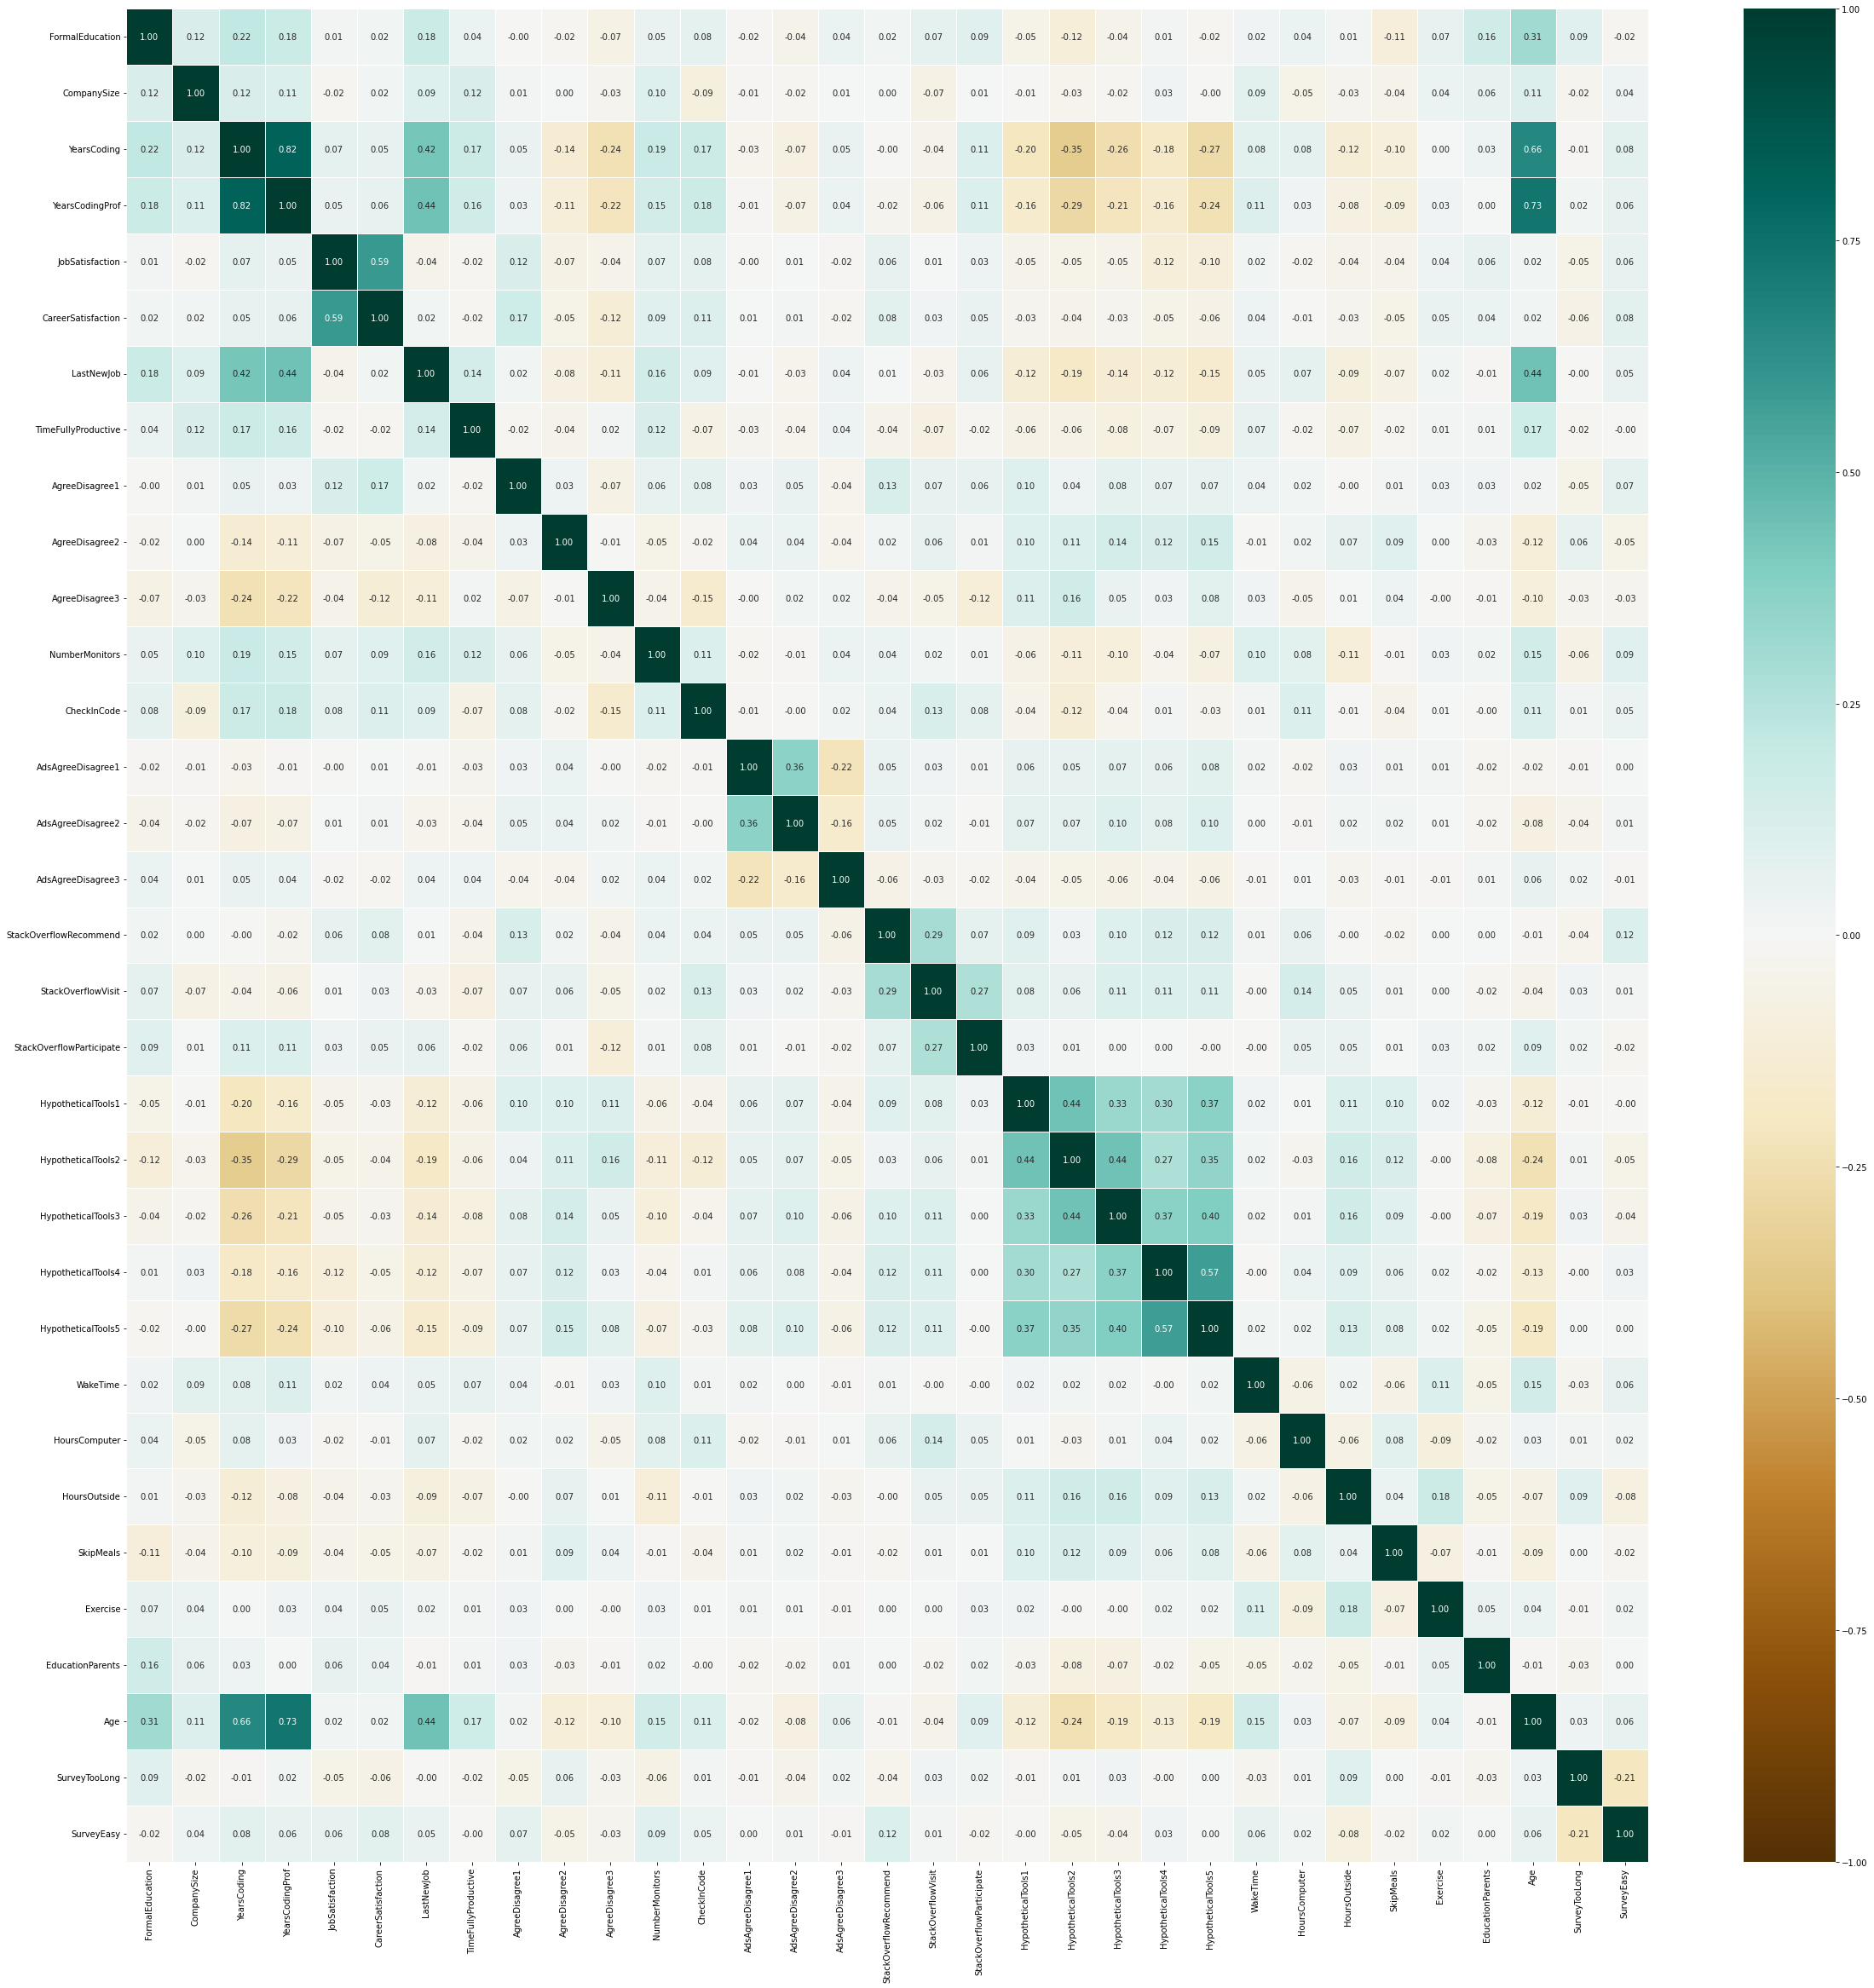

In [50]:
fig, ax = plt.subplots(figsize=(40,40))
corr1 = df_ordinal_encoding.corr('spearman')
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

In [51]:
resuldfHeatmapOrdNumt = pd.concat([df_ordinal_encoding, df['ConvertedSalary']],  axis=1, join="inner")

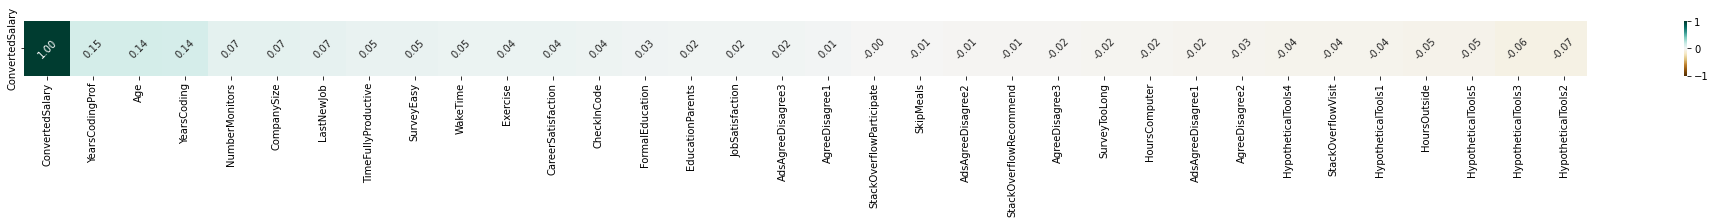

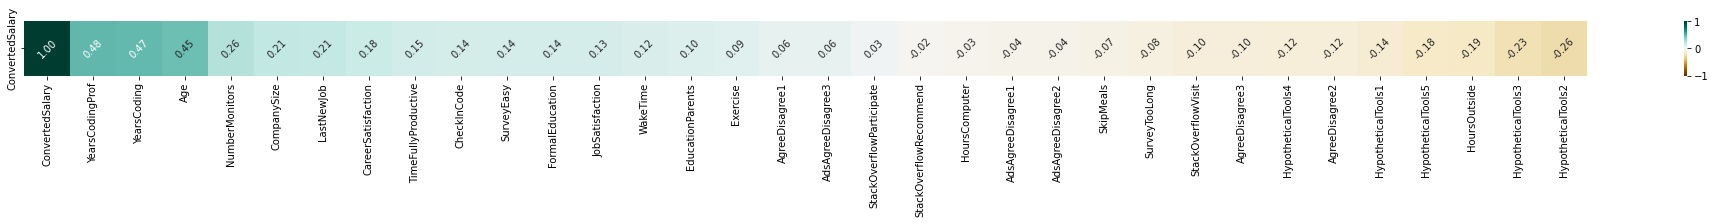

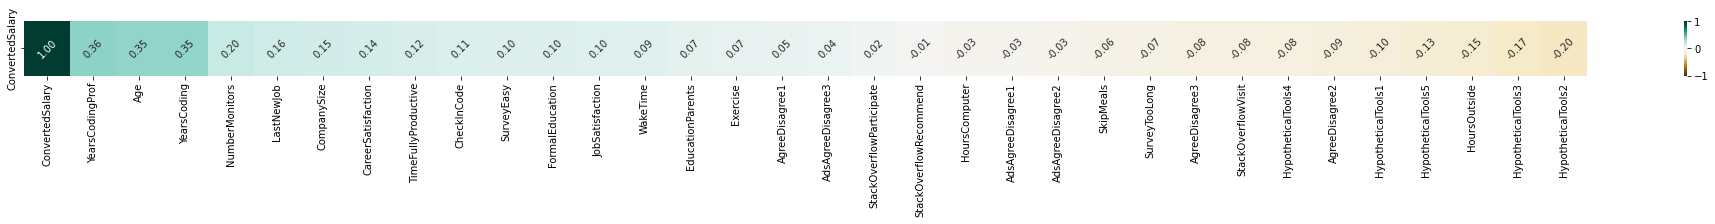

In [52]:
#Ordinal Datas with ConvertedSalary HeatMap

for i in ['pearson','spearman', 'kendall']:
    fig, ax = plt.subplots(figsize=(35,1))
    corr1 = resuldfHeatmapOrdNumt.corr(i)[['ConvertedSalary']].sort_values(by='ConvertedSalary', ascending=False)
    sns.heatmap(corr1.T, ax=ax, annot=True, cmap='BrBG', fmt=".2f", vmin=-1, vmax=1, annot_kws={'rotation': 45})


In [53]:
#corr dusuk cikanlar silindi
df.drop(['StackOverflowRecommend','StackOverflowParticipate','AdsAgreeDisagree1','AdsAgreeDisagree2','HoursComputer'], axis=1, inplace=True)

In [54]:
df.shape

(98855, 113)

### Numerical Datas HeatMap

<AxesSubplot:>

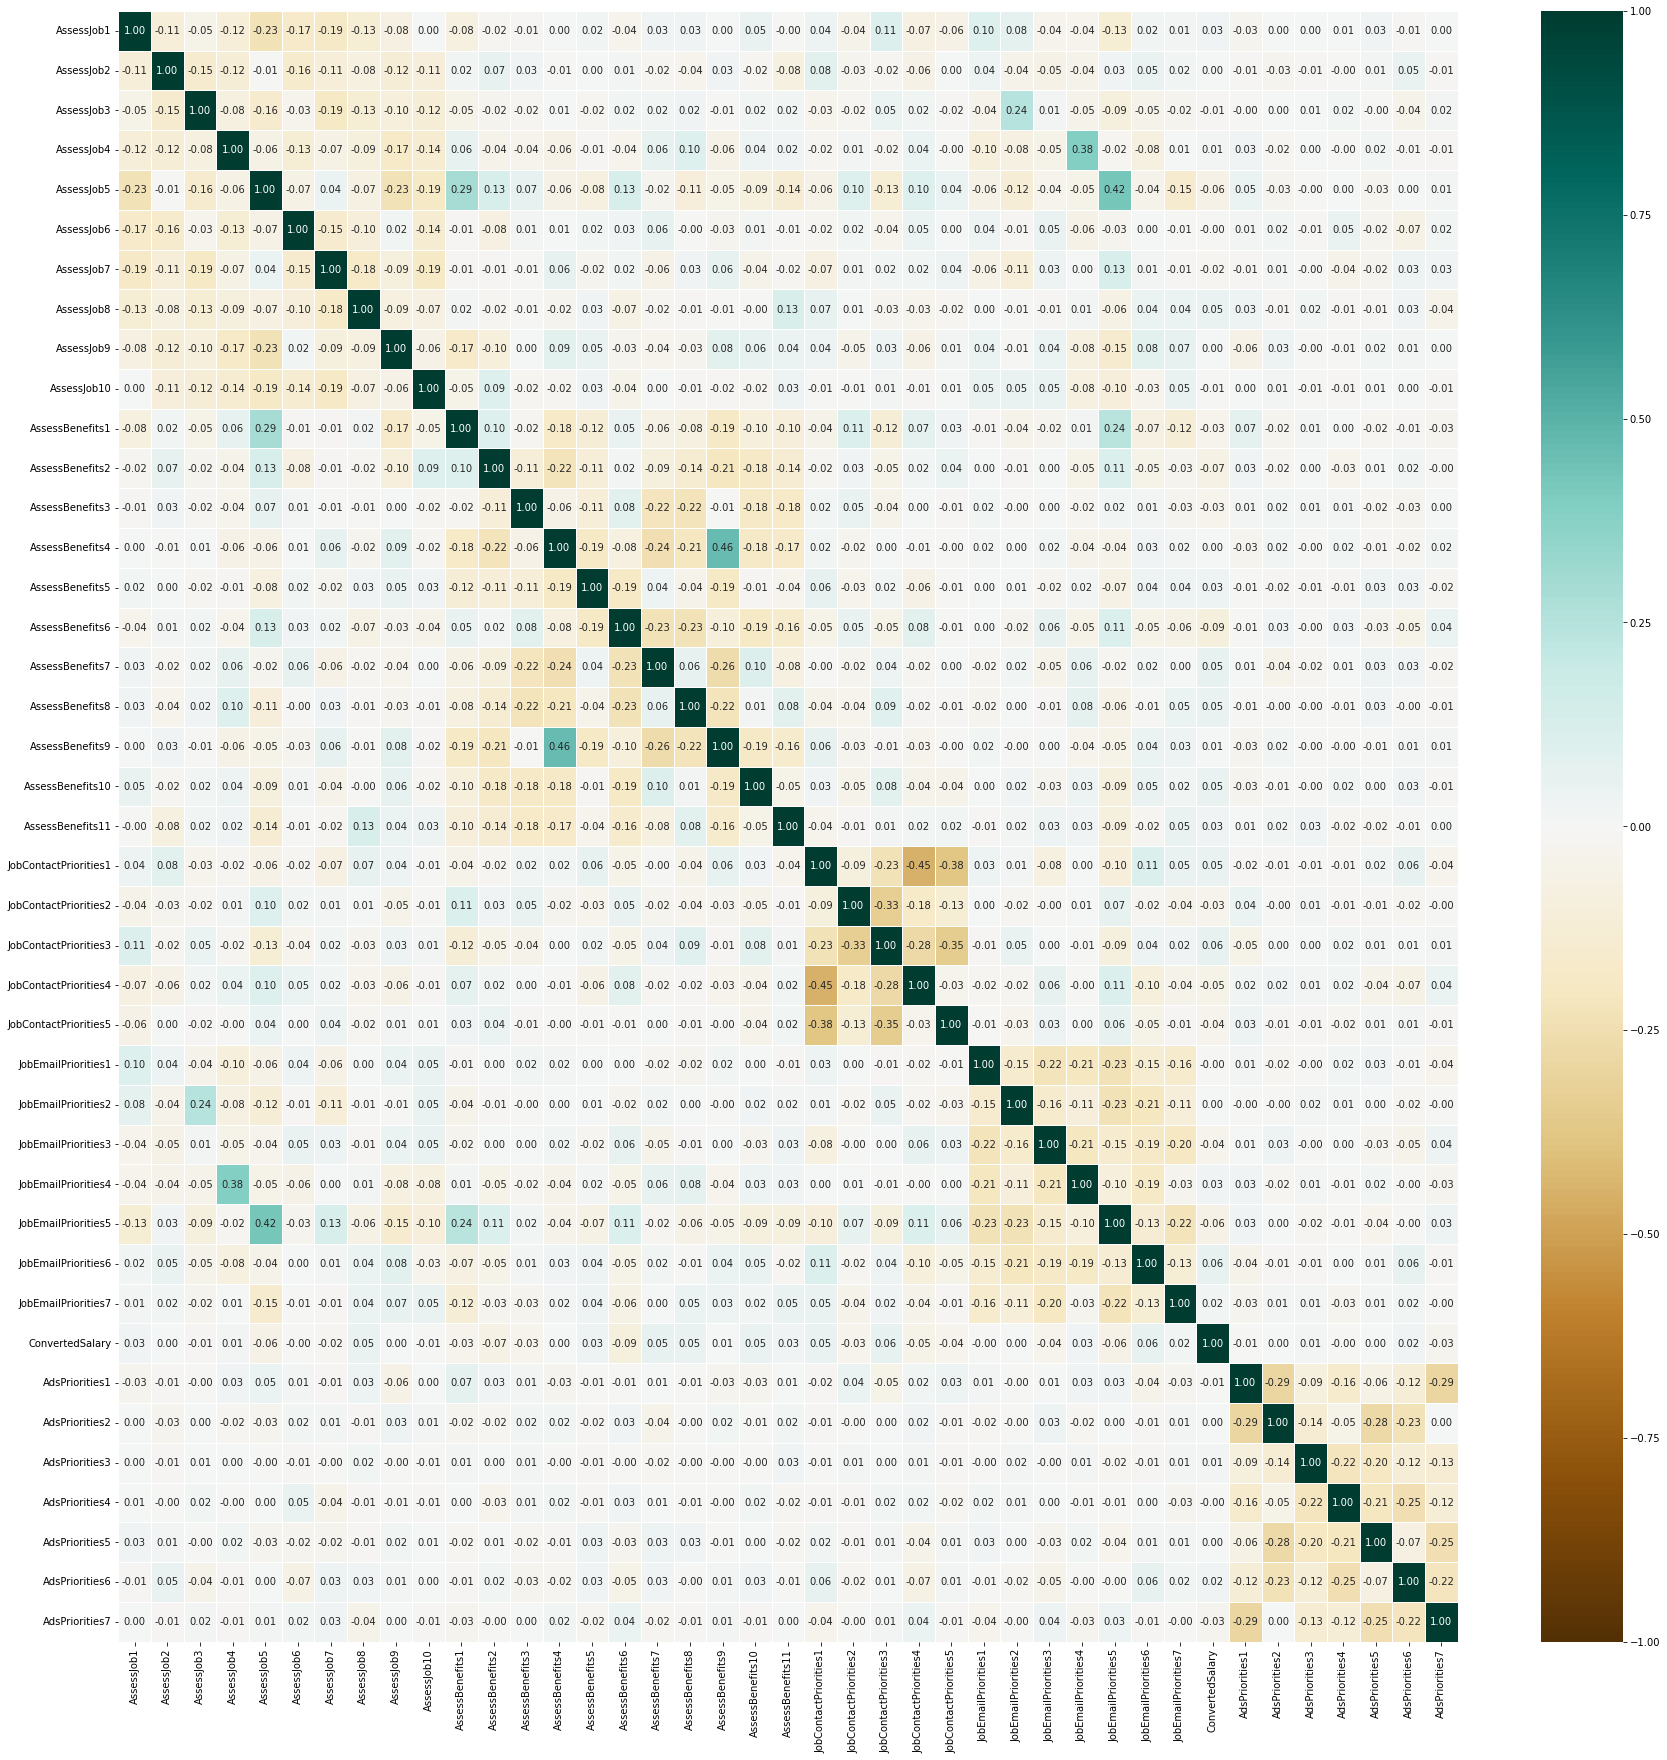

In [55]:
# Numeric datalarin kendi arasindaki corr.
fig, ax = plt.subplots(figsize=(30,30))
corr1 = df_numerical.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

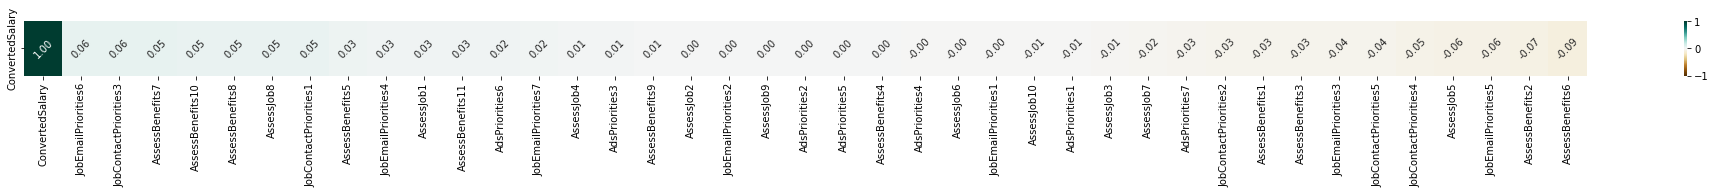

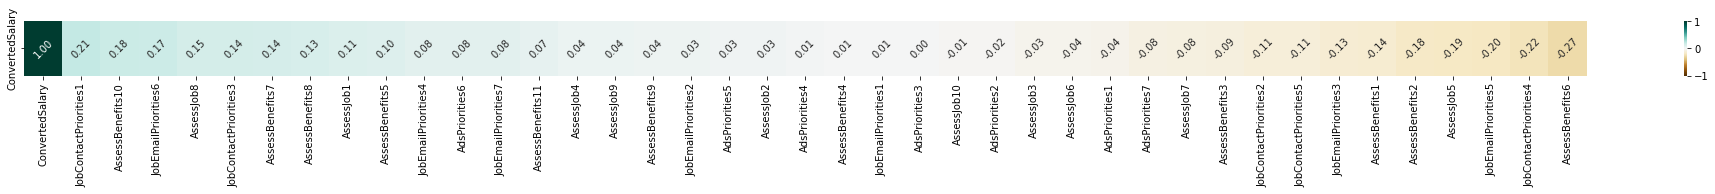

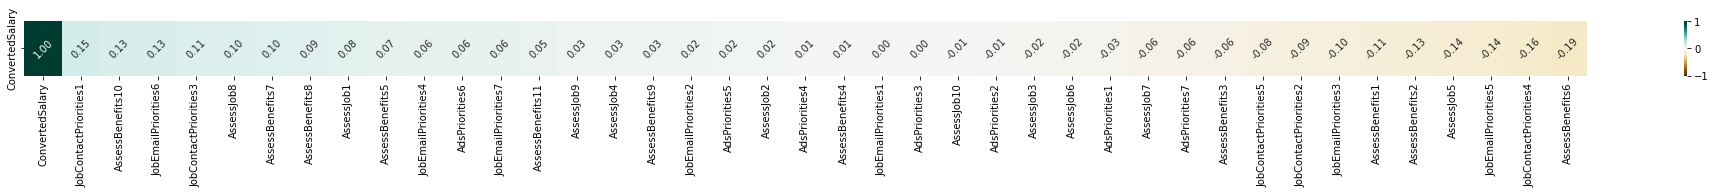

In [56]:
# Corr with Numerical - Converted Salary
for i in ['pearson','spearman', 'kendall']:
    fig, ax = plt.subplots(figsize=(35,1))
    corr1 = df_numerical.corr(i)[['ConvertedSalary']].sort_values(by='ConvertedSalary', ascending=False)
    sns.heatmap(corr1.T, ax=ax, annot=True, cmap='BrBG', fmt=".2f", vmin=-1, vmax=1, annot_kws={'rotation': 45})


In [57]:
# Corr. cok düsük cikanlar drop edilmesi
df.drop(['JobEmailPriorities1','JobEmailPriorities2',
         'AdsPriorities1','AdsPriorities2','AdsPriorities3','AdsPriorities4','AdsPriorities5',
         'AssessJob2','AssessJob3','AssessJob4','AssessJob6','AssessJob9',
         'AssessJob10', 'AssessBenefits4','AssessBenefits9'], axis=1, inplace=True)

In [58]:
df.shape

(98855, 98)

# 3. Outlier Detection

## Outlier Data Vis

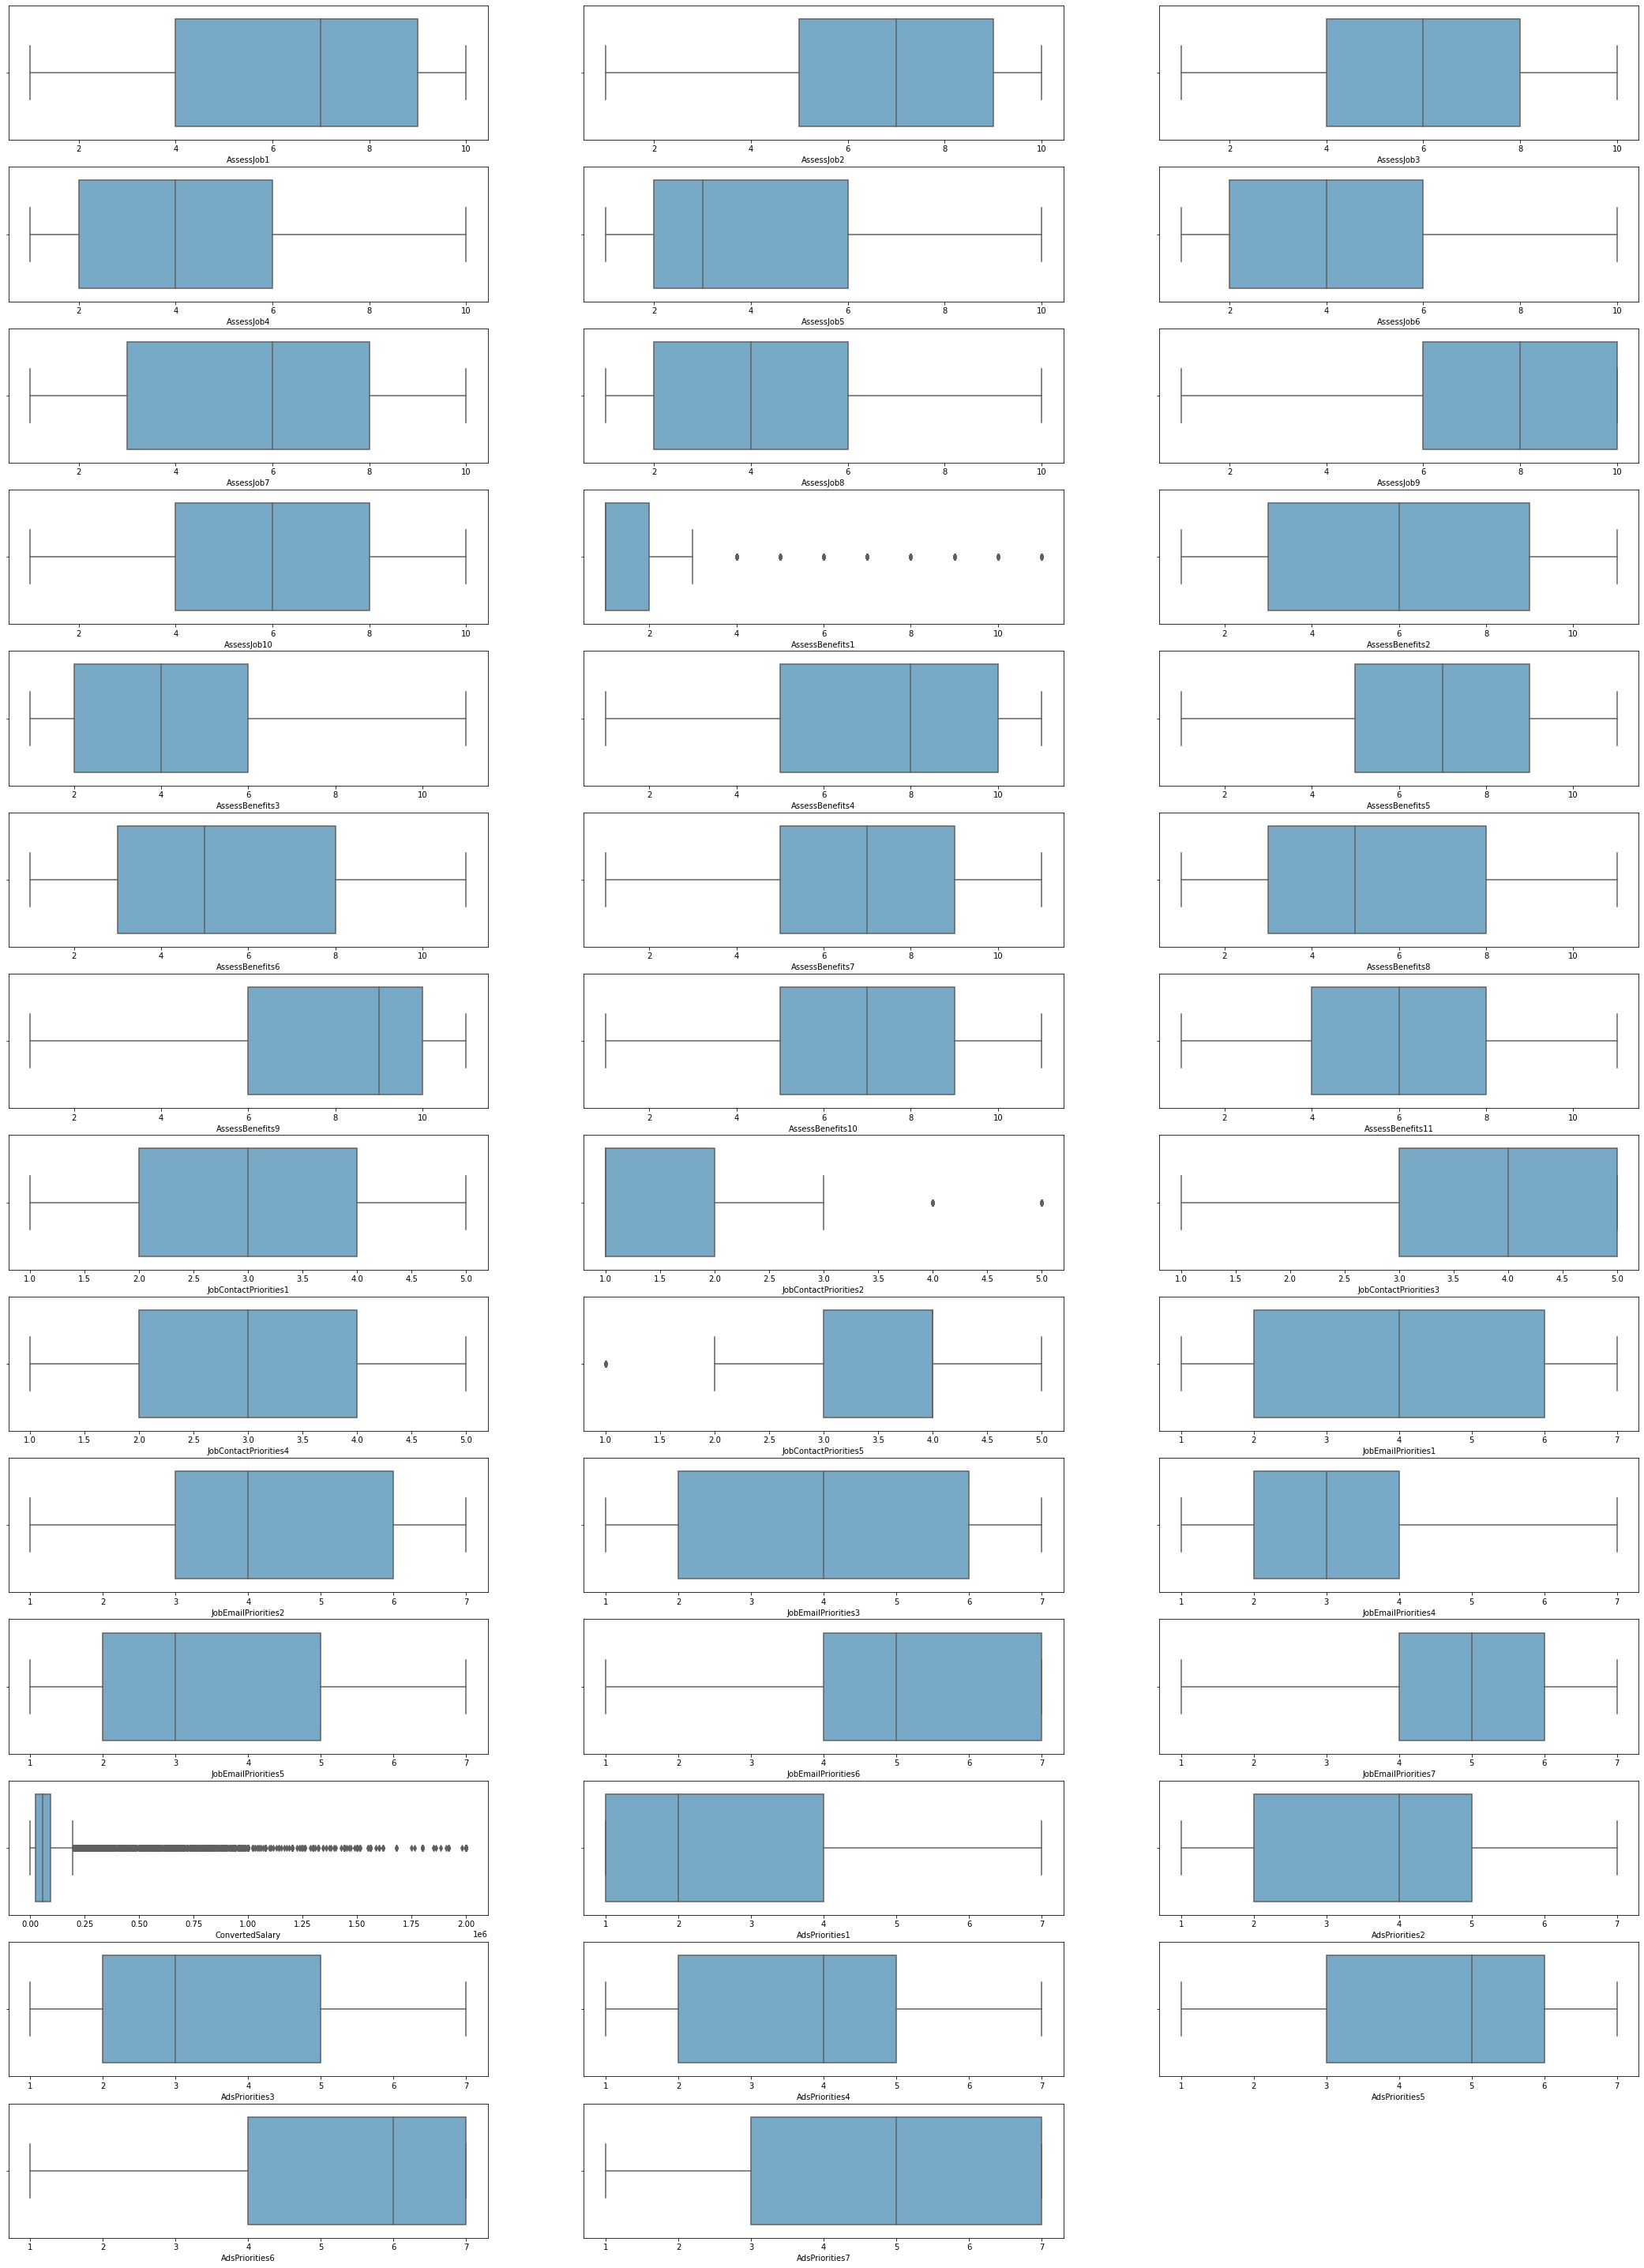

In [59]:
# elimizde numeric olarak gözüken tüm datanin Outlier box grafigi
i = 1
plt.figure(figsize=(37, 52))
for feature in df_numerical.columns:
    plt.subplot(14, 3, i)
    sns.boxplot(x=df_numerical[feature], palette="Blues")
    i += 1



<AxesSubplot:xlabel='ConvertedSalary'>

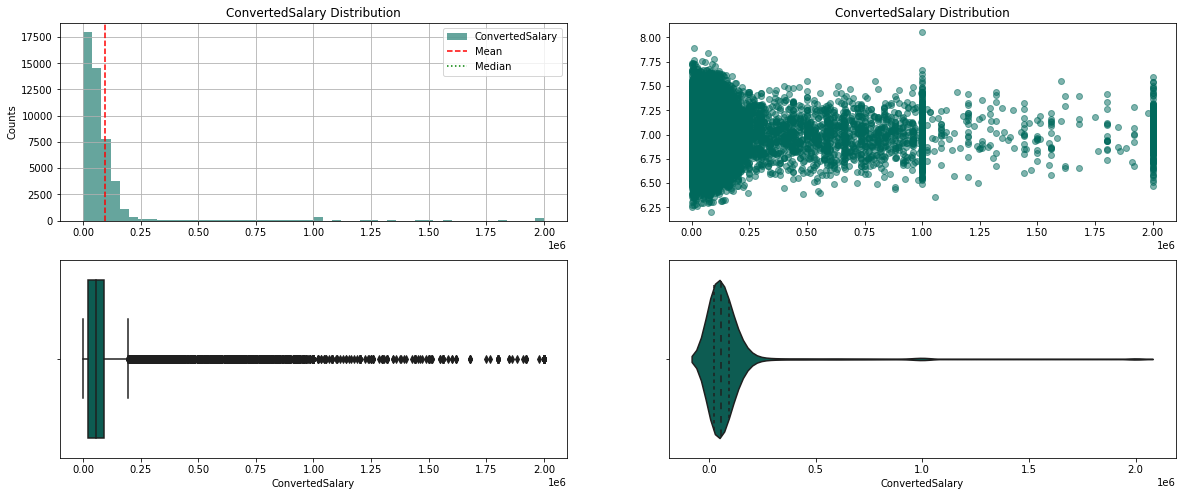

In [60]:
# Yukarida gözüktügü gibi yalnizca ConvertedSalary sütunu outlier dan arindirilmali asagida detayli 4 farkli grafik türü ile gösterilmesi
data=df

plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
data['ConvertedSalary'].hist(bins=50, label='ConvertedSalary', alpha=0.6, color='#00695C')
plt.axvline(np.mean(data['ConvertedSalary']), ls='--', c='r', label="Mean")
plt.axvline(np.median(data['ConvertedSalary']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("ConvertedSalary Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['ConvertedSalary'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5 ,color='#00695C')
plt.title("ConvertedSalary Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(x="ConvertedSalary", data=data ,color='#00695C')

plt.subplot(2, 2, 4)
sns.violinplot(x="ConvertedSalary", data=data, inner="quartile", bw=0.2 ,color='#00695C')

## 'O' Values Salary Delete

In [61]:
# ConvertedSalary 0 olan verilerin arastirilmasi
(df['ConvertedSalary'] == 0).sum()

842

In [62]:
#Calisip 0 yazilan 121 deger Nan kabul edilip drop edildi
nul_salary= df.loc[(df["ConvertedSalary"]==0) & ((df["Employment"] == 'Employed full-time')|(df["Employment"] =='Employed part-time'))]
nul_salary.index

Int64Index([   14,   488,  1818,  1963,  2395,  3248,  3720,  4395,  4967,
             6557,
            ...
            71152, 71189, 72372, 73856, 73878, 74896, 75330, 79355, 80287,
            89960],
           dtype='int64', length=121)

In [63]:
df.drop(list(nul_salary.index), axis=0, inplace=True)

In [64]:
df.shape

(98734, 98)

In [65]:
df= df.reset_index(drop=True)

## 1. Z Score

In [66]:
# Z skor analizi yapilarak verinin 2,3,4 ve 5 esik degerinde outlier verileri görsellestirildi
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

In [67]:
z_score(df['ConvertedSalary'], threshold=2).sum()

z-score of 2 corresponds to a prob of 0.27%
Rejection 52700 points


46034

z-score of 2 corresponds to a prob of 0.27%
Rejection 52700 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 52329 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 52028 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 51518 points


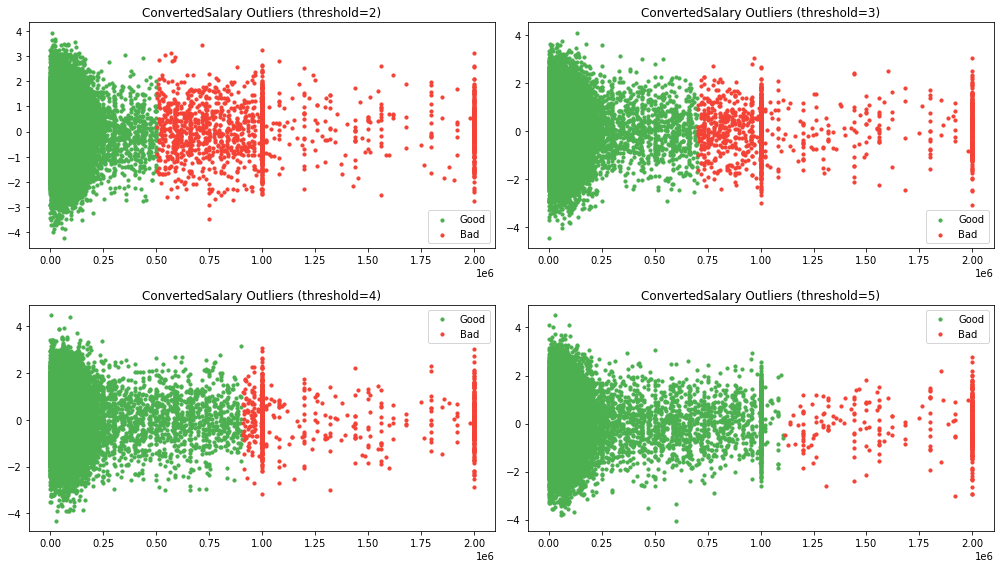

In [68]:
#ConvertedSalary Nan Value 51153
#esik 2 ye göre 1547
#esik 3 ye göre 1176
#esik 4 ye göre 875
#esik 5 ye göre 365

plt.figure(figsize=(14, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(df['ConvertedSalary'], threshold=threshold)
    plt.scatter(df['ConvertedSalary'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(df['ConvertedSalary'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"ConvertedSalary Outliers (threshold={threshold})")

plt.tight_layout()

In [69]:
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [70]:
out_salary = outliers_z_score(df['ConvertedSalary'])

In [71]:
import operator
from functools import reduce 
# printing output
#list(reduce(operator.concat, out_salary))

In [72]:
#df.drop(list(reduce(operator.concat, out_salary)), axis=0, inplace=True)

In [73]:
#df = df.reset_index(drop=True)

In [74]:
#df.shape

In [75]:
#df['ConvertedSalary'].describe().T

## 2. IQR Method

In [76]:
# outlier analizi icin converted salary nan olmayan degerler icin filteleme yapildi
filtered_df = df[df['ConvertedSalary'].isnull()]
filtered_df.shape

(51153, 98)

In [77]:
# IQR yöntemi ile 2633 tane outlier deger tespit edilmistir
def outlier(data):
    global ust_sinir , alt_sinir ,df_table
    df_table = data
    Q1 = df_table.quantile(0.25)
    Q3 = df_table.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-1.5*IQR
    ust_sinir = Q3+1.5*IQR
    aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
    index_aykiri_tf= df_table[aykiri_tf].index
    df_table = pd.DataFrame(df_table)
    df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir)))]
   
    return index_aykiri_tf 

In [78]:
outlier(df.ConvertedSalary)

Int64Index([    8,    26,   124,   127,   196,   224,   235,   268,   327,
              395,
            ...
            86759, 86899, 87312, 87371, 87611, 87748, 88457, 89210, 89338,
            89634],
           dtype='int64', length=2633)

In [79]:
#df.drop(list(outlier(df.ConvertedSalary)), axis=0, inplace=True)

In [80]:
# RightSkewed Outlier garfige sahip bir verimiz var skew degeri hesaplandi
print(df['ConvertedSalary'].skew())

6.310580937905943


In [81]:
# https://cxl.com/blog/outliers/
# Yukaridaki analizler isiginda veri kaybinin önlenmesi icin verinin %95 lik kismindan sonraki degerlerin ayni ülke ve ayni tecrübeye sahip verilerle  degistirilmesine karar verildi 
df['ConvertedSalary'].quantile(0.95)

216036.0

In [82]:
# bu tablo outlier olmayan verinin ülkelerdeki tecrübeye göre mean ConvertedSalary leri gösterilmektedir
df_results_public[df_results_public['ConvertedSalary'] < 216000].groupby(["Country", "YearsCodingProf"])['ConvertedSalary'].mean()

Country      YearsCodingProf
Afghanistan  0-2 years          9909.33
             21-23 years           0.00
             3-5 years          2663.50
Albania      0-2 years          9031.78
             3-5 years         22117.20
                                 ...   
Zambia       0-2 years          1824.00
Zimbabwe     0-2 years         26057.14
             3-5 years         16530.00
             6-8 years         36000.00
             9-11 years        16800.00
Name: ConvertedSalary, Length: 928, dtype: float64

In [83]:
df_lower  = df[df['ConvertedSalary'] < 216000]
left      = df[df['ConvertedSalary'] > 216000]
right     = df_lower.groupby(["Country", "YearsCodingProf"])['ConvertedSalary'].mean()
result    = pd.merge(left, right, how="left", on=["Country", "YearsCodingProf"])

In [84]:
result['ConvertedSalary'] = result['ConvertedSalary_y']
result.drop(['ConvertedSalary_x', 'ConvertedSalary_y'], axis=1, inplace=True)

In [85]:
# yapilan filtreleme islemi soncununda 30 veri karsiligi olmadigi icin Nan döndü bu daha sonra ConvertedSalary nin diger nan verileri ile drop edildi
result.ConvertedSalary.isnull().sum()

30

In [86]:
dfw = result.append(df_lower)
dfw.shape

(47579, 98)

In [87]:
df = filtered_df.append(dfw)

In [88]:
#df.loc[outlier, 'ConvertedSalary'] = df.groupby(["Country","YearsCodingProf"])[['ConvertedSalary']].transform(lambda x: x.mean())

In [89]:
#df.drop(list(outlier(df.ConvertedSalary)), axis=0, inplace=True)

In [90]:
# skew degeri tekrar hesaplandi
print(df['ConvertedSalary'].skew())

0.7627774993755206


In [91]:
# Silme ve doldurma sonra index resetlendi
df= df.reset_index(drop=True)

In [92]:
#outlier analizi sonucunda sadece 0 degerlerden dolayi 121 veri silindi ayrica Outlier doldurma sonucunda Nan olarak degeri dönen 30 veride asagida drop edildi
df.shape

(98732, 98)

<AxesSubplot:xlabel='ConvertedSalary'>

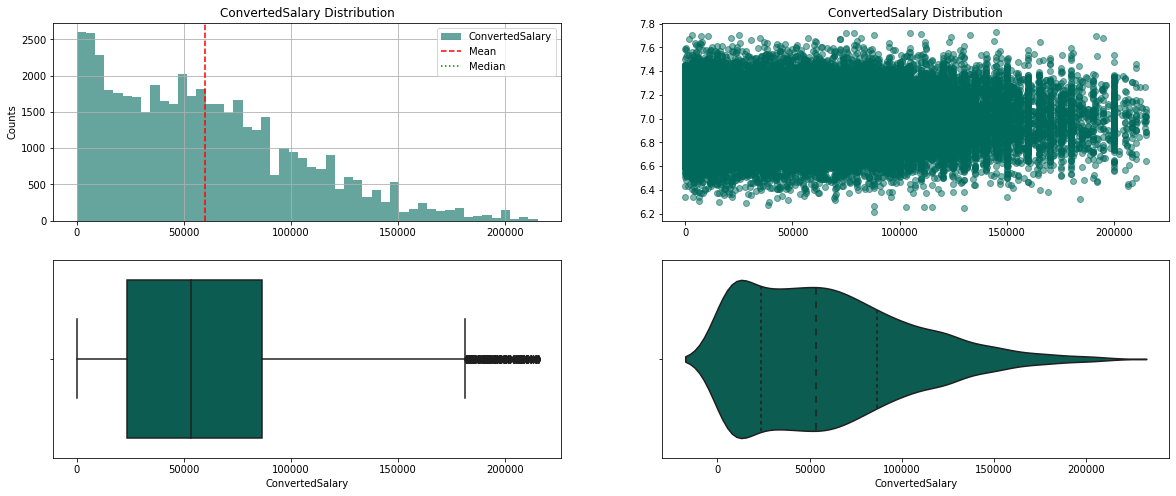

In [93]:
# Outlier islemleri sonrasi veri tekrar görsellestirildi
data=df

plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
data['ConvertedSalary'].hist(bins=50, label='ConvertedSalary', alpha=0.6, color='#00695C')
plt.axvline(np.mean(data['ConvertedSalary']), ls='--', c='r', label="Mean")
plt.axvline(np.median(data['ConvertedSalary']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("ConvertedSalary Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data['ConvertedSalary'], np.random.normal(7, 0.2, size=data.shape[0]), alpha=0.5 ,color='#00695C')
plt.title("ConvertedSalary Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(x="ConvertedSalary", data=data ,color='#00695C')

plt.subplot(2, 2, 4)
sns.violinplot(x="ConvertedSalary", data=data, inner="quartile", bw=0.2 ,color='#00695C')

# 4. Nan Value Imputation

In [94]:
newdf = df.select_dtypes(include=np.number)
# denemeler esnadinda datanin bir kismi ile test icin 
#newdf = newdf.sample(frac=0.50)
newdf.head(2)


,FormalEducation,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob5,AssessJob7,...,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
0,5.00,2.00,1.00,2.00,3.00,3.00,1.00,10.00,2.00,3.00,...,4.00,4.00,8.00,3.00,0.00,2.00,5.00,2.00,0.00,2.00
1,4.00,2.00,8.00,3.00,2.00,2.00,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
newdf.isna().sum()

FormalEducation      4148
CompanySize         27315
YearsCoding          5020
YearsCodingProf     20945
JobSatisfaction     29571
                    ...  
Exercise            26737
EducationParents    37015
Age                 34258
SurveyTooLong       32897
SurveyEasy          32959
Length: 54, dtype: int64

In [96]:
# Nan valuelerin doldurulmadan ConvertedSalary ile olan Corr.
df_corr_before_nan_value= pd.DataFrame(newdf[newdf.columns[1:]].corr(method='spearman')['ConvertedSalary'][:-1])
#df_corr_before_nan_value.sort_values(by='ConvertedSalary', ascending=False)

In [97]:
newdf= newdf.reset_index(drop=True)

In [98]:
# nan valueler targettan bagimsiz birsekilde doldurulmasi icin veriden ConvertedSalary ayrildi
X = newdf.drop('ConvertedSalary', 1)
y = newdf['ConvertedSalary']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [99]:
edf = X.copy(deep = True)

In [100]:
# Nan valueler doldurulur iken verinin tamami kullanildi

In [101]:
edf.shape

(98732, 53)

## IterativeImputer

In [102]:
# Nan value doldurdurmak icin 3 ayri yöntem test edildi KNN imputer, simple imputer ve Iterativ imputer en verimli sonuclar bunda alindi
# https://towardsdatascience.com/advanced-missing-data-imputation-methods-with-sklearn-d9875cbcc6eb
# https://thomasjpfan.github.io/scikit-learn-website/auto_examples/impute/plot_iterative_imputer_variants_comparison.html

In [103]:
exEstimator = ExtraTreeRegressor(max_features='sqrt', random_state=42) 
exImputer   = IterativeImputer(estimator=exEstimator, imputation_order='random', verbose = 2 , max_iter = 30 , tol= 1e-10 )
exImputer.fit(edf)


[IterativeImputer] Completing matrix with shape (98732, 53)
[IterativeImputer] Ending imputation round 1/30, elapsed time 9.85
[IterativeImputer] Change: 106.77255551630569, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 2/30, elapsed time 19.56
[IterativeImputer] Change: 145.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 3/30, elapsed time 29.28
[IterativeImputer] Change: 139.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 4/30, elapsed time 39.02
[IterativeImputer] Change: 139.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 5/30, elapsed time 48.98
[IterativeImputer] Change: 139.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 6/30, elapsed time 58.63
[IterativeImputer] Change: 136.0, scaled tolerance: 1.1000000000000001e-09 
[IterativeImputer] Ending imputation round 7/30, elapsed time 68

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



IterativeImputer(estimator=ExtraTreeRegressor(max_features='sqrt',
                                              random_state=42),
                 imputation_order='random', max_iter=30, tol=1e-10, verbose=2)

In [104]:
exTrans = pd.DataFrame(exImputer.transform(edf), columns=edf.columns)
exTrans.head(3)

[IterativeImputer] Completing matrix with shape (98732, 53)
[IterativeImputer] Ending imputation round 1/30, elapsed time 1.50
[IterativeImputer] Ending imputation round 2/30, elapsed time 3.10
[IterativeImputer] Ending imputation round 3/30, elapsed time 4.70
[IterativeImputer] Ending imputation round 4/30, elapsed time 6.30
[IterativeImputer] Ending imputation round 5/30, elapsed time 7.90
[IterativeImputer] Ending imputation round 6/30, elapsed time 9.62
[IterativeImputer] Ending imputation round 7/30, elapsed time 11.31
[IterativeImputer] Ending imputation round 8/30, elapsed time 12.94
[IterativeImputer] Ending imputation round 9/30, elapsed time 14.55
[IterativeImputer] Ending imputation round 10/30, elapsed time 16.13
[IterativeImputer] Ending imputation round 11/30, elapsed time 17.72
[IterativeImputer] Ending imputation round 12/30, elapsed time 19.31
[IterativeImputer] Ending imputation round 13/30, elapsed time 21.07
[IterativeImputer] Ending imputation round 14/30, elapsed 

,FormalEducation,CompanySize,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,LastNewJob,AssessJob1,AssessJob5,AssessJob7,...,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursOutside,SkipMeals,Exercise,EducationParents,Age,SurveyTooLong,SurveyEasy
0,5.00,2.00,1.00,2.00,3.00,3.00,1.00,10.00,2.00,3.00,...,4.00,4.00,8.00,3.00,0.00,2.00,5.00,2.00,0.00,2.00
1,4.00,2.00,8.00,3.00,2.00,2.00,1.00,1.00,10.00,6.00,...,2.00,4.00,4.00,3.00,0.00,3.00,5.00,1.00,1.00,2.00
2,5.00,3.00,6.00,5.00,0.00,-1.00,1.00,8.00,2.00,1.00,...,2.00,2.00,7.00,1.00,2.00,0.00,3.00,3.00,0.00,1.00


<AxesSubplot:>

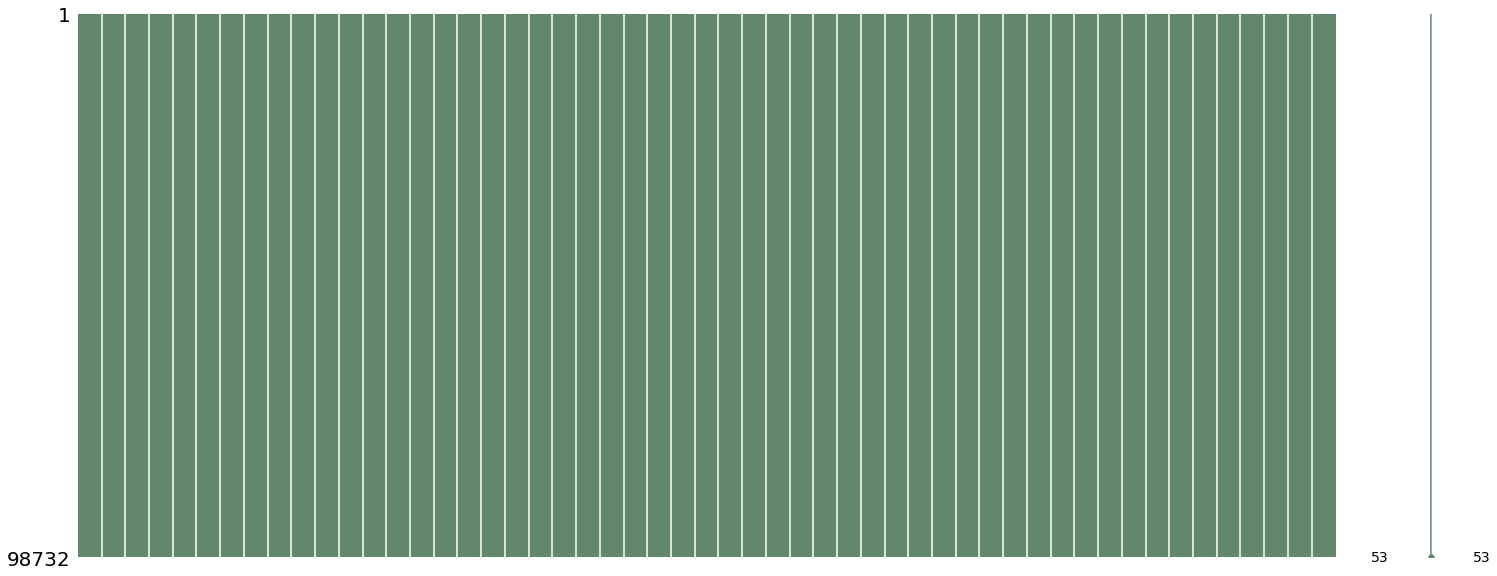

In [105]:
# doldurulan verinin görsleestirilmesi
msno.matrix(exTrans, color=(0.39, 0.53, 0.42))

In [106]:
# degerlerin tamaminin doldurulup doldurulmadi teyiti
exTrans.isnull().sum().sum()

0

In [107]:
df_trans = exTrans.copy(deep=True)

In [108]:
# Nan valuleri doldurmak icin ayirdigimiz Converted salarynin tekrar concat edilmesi 
df_trans = pd.concat([df_trans, y.reindex(df_trans.index)], axis=1)
df_trans.shape

(98732, 54)

In [109]:
# Nan value doldurulmasi sonrasi Correleasyon tekrar hesaplandi
df_corr_after_nan_value= pd.DataFrame(df_trans[df_trans.columns[1:]].corr(method='spearman')['ConvertedSalary'][:-1])
#df_corr_after_nan_value.sort_values(by='ConvertedSalary', ascending=False)

In [110]:
# öncesi ve sonrasi burada karsilastirildi
result_corr = pd.concat([df_corr_before_nan_value, df_corr_after_nan_value], axis=1)
result_corr

,ConvertedSalary,ConvertedSalary
CompanySize,0.22,0.20
YearsCoding,0.50,0.50
YearsCodingProf,0.52,0.52
JobSatisfaction,0.15,0.15
CareerSatisfaction,0.19,0.19
...,...,...
Exercise,0.09,0.09
EducationParents,0.12,0.11
Age,0.47,0.46
SurveyTooLong,-0.09,-0.09


# 5. Feature Engineering


## Language Worked With Salary

In [111]:
def feature_eng(num):
    num = float("{:.3g}".format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    result = "{}{}".format("{:f}".format(num).rstrip("0").rstrip('.'), ["", "K", "M", "B", "T"][magnitude])
    return result

In [112]:
# Filter and extract languages in `LanguageWorkedWith` column
lang_sal_df = df[(df["Student"] == 'No')][["LanguageWorkedWith", "ConvertedSalary"]]
lang_sal_df["LanguageWorkedWith"] = lang_sal_df["LanguageWorkedWith"].str.split(";")
lang_sal_df = lang_sal_df.explode("LanguageWorkedWith")

# Clean records having nan values
lang_sal_df = lang_sal_df.dropna(how="any", axis=0)

# Aggreate by language and calculate the median of salary
lang_sal_df = lang_sal_df.groupby(["LanguageWorkedWith"]).median()["ConvertedSalary"].sort_values()
lang_sal_df = pd.DataFrame({"LanguageWorkedWith": lang_sal_df.index,  "ConvertedSalary": lang_sal_df.values})
lang_sal_df.rename(columns={"LanguageWorkedWith": "Coding Languague"}, inplace=True)

# Create a new column of label used for visualization
lang_sal_df["Label"] = lang_sal_df.apply(lambda row: "$" + feature_eng(round(row["ConvertedSalary"], 0)), axis=1)

fig = px.bar( lang_sal_df, 
              width=900, height=800, 
              x="ConvertedSalary", y="Coding Languague", 
              orientation="h", 
              title="Language vs Salary", text="Label", color="ConvertedSalary",)
fig.show()

## Dev. Type With Salary

In [113]:
# Filter professional developer and extract developer type from DevType column
dev_sal_df = df[["DevType", "ConvertedSalary"]]
dev_sal_df = dev_sal_df.dropna(how="any", axis=0)
dev_sal_df["DevType"] = dev_sal_df["DevType"].str.split(";")
dev_sal_df = dev_sal_df.explode("DevType")

# Get the salary median group by DevType
dev_sal_df = dev_sal_df.groupby(["DevType"]).median()["ConvertedSalary"].sort_values(ascending=False)
dev_sal_df = pd.DataFrame({"DevType": dev_sal_df.index,  "ConvertedSalary": dev_sal_df.values})

# Create Label column used for visualization
dev_sal_df["Label"] = dev_sal_df.apply(lambda row: "$" + feature_eng(round(row["ConvertedSalary"], 0)), axis=1)

# Show the chart
fig = px.bar(dev_sal_df,
             width=1000, height=700, 
             x="ConvertedSalary", y="DevType", 
             title="Salary vs Dev Type", text="Label", color="DevType")

fig.show()

## Creating new features from existing features

In [114]:
# commitontools, languageworked with gibi sütunlardaki özellikler saydirilarak yeni bir sütun elde edildi ancak digerlerinin correlasyonu cok düsük ciktigi icin sadece degeri biraz daha iyi olan CommunicationTools_Count dahil edildi 
df['CommunicationTools_Count'] = df['CommunicationTools'].str.count(';') + 1

In [115]:
df_count= df[['CommunicationTools_Count','ConvertedSalary']]
df_count.corr('spearman').T

,CommunicationTools_Count,ConvertedSalary
CommunicationTools_Count,1.00,0.17
ConvertedSalary,0.17,1.00


In [116]:
df[['CommunicationTools_Count']] = df[['CommunicationTools_Count']].fillna(value=0)

In [117]:
df_trans= pd.concat([df['CommunicationTools_Count'], df_trans], axis=1)

In [118]:
df_trans.shape

(98732, 55)

## Categorik Nominal Data get_dummies

In [119]:
listem=['Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'UndergradMajor', 'UpdateCV','DevType', 'HopeFiveYears', 'JobSearchStatus',
        'CommunicationTools', 'EducationTypes', 'SelfTaughtTypes','LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 
        'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 
        'OperatingSystem', 'Methodology', 'VersionControl', 'AdBlocker',   'AdBlockerDisable', 'AdsActions', 'AIDangerous', 'AIInteresting',
        'AIResponsible', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowHasAccount', 'StackOverflowJobs',
        'StackOverflowDevStory', 'StackOverflowConsiderMember', 'Gender', 'SexualOrientation', 'RaceEthnicity',
        'Dependents', 'EthicsChoice','AIFuture']
        
for i in listem:
  gd_df_x = df[i].str.get_dummies(sep=';').add_prefix(i+'_')
  df_trans= pd.concat([gd_df_x, df_trans], axis=1, join='inner')

# 6. Feature Selection

In [120]:
#https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
df_last =  df_trans.copy(deep = True)

In [121]:
#ConvertedSalary nan degerler drop edildi
df_last = df_last.dropna(subset=['ConvertedSalary'])


In [122]:
df_last.isnull().sum().sum()

0

In [123]:
X = df_last.drop('ConvertedSalary', axis=1)
y = df_last['ConvertedSalary']

In [124]:
print(y.shape, X.shape)

(47549,) (47549, 633)


In [125]:
# Mutual info regression metodu ile FeatureSelection yapildi
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fit = fs.fit(X, y)


In [126]:
# Featureselection scorelari liste ile yazdirildi
df_feat=pd.DataFrame(fs.scores_, X.columns)
df_feat.sort_values(by=0 , ascending=False)

,0
Country_United States,0.45
YearsCodingProf,0.29
YearsCoding,0.22
Country_United Kingdom,0.22
Country_India,0.21
...,...
PlatformWorkedWith_iOS,0.00
Country_San Marino,0.00
Country_Ecuador,0.00
IDE_TextMate,0.00


In [127]:
# en etkili ilk 50 sütun görsellestirilmesi
feature_imp     = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top150_feature  = feature_imp.nlargest(n=50, columns=['Score'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



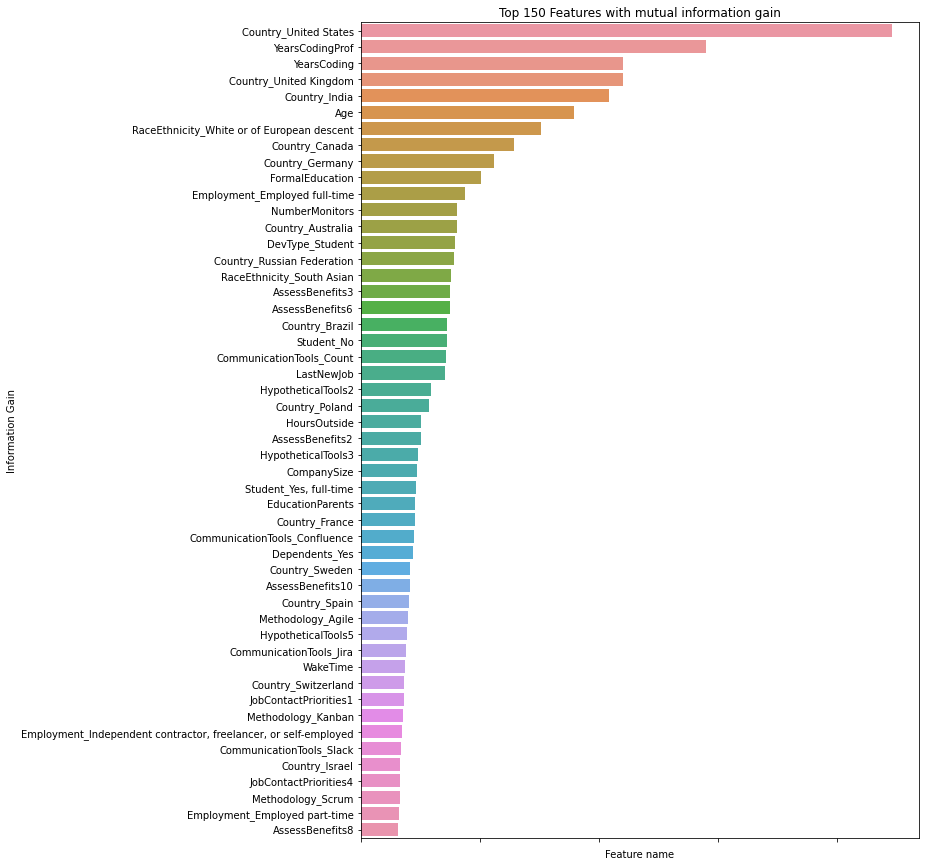

In [128]:
plt.figure(figsize=(10,15))
g = sns.barplot(y=top150_feature.index, x=top150_feature['Score'])
p = plt.title('Top 150 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



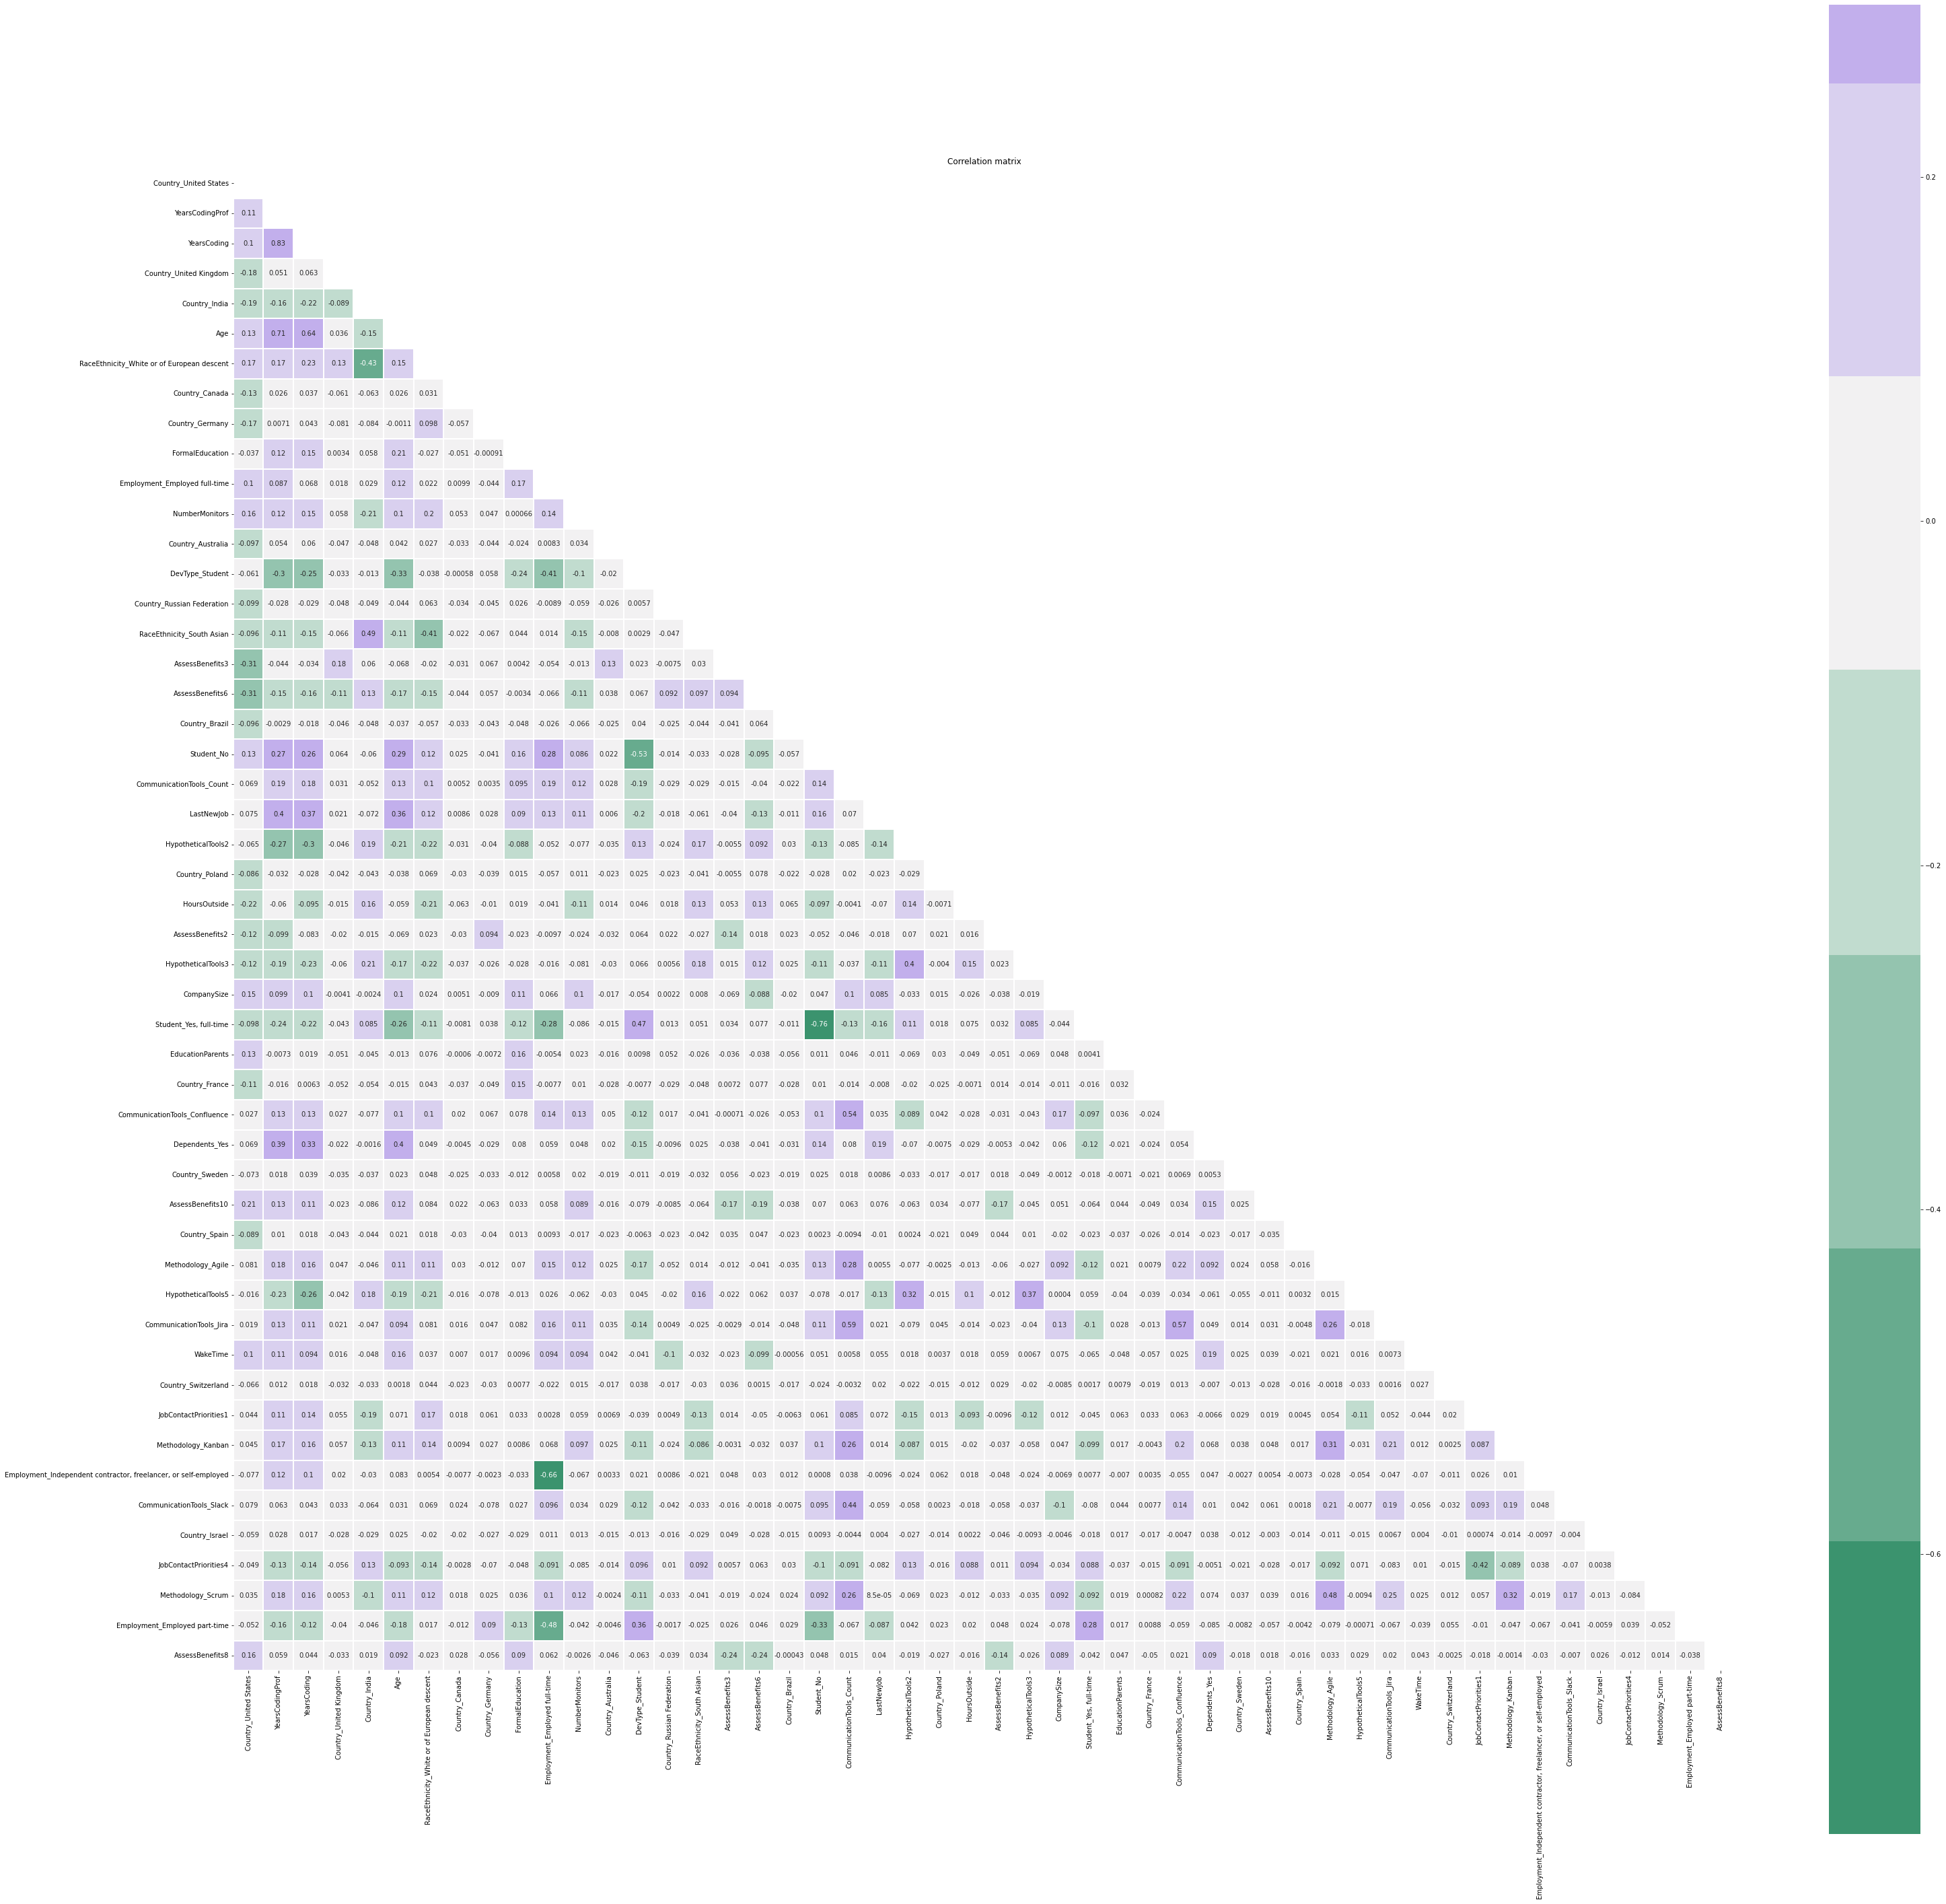

In [129]:
# bu 50 sütunun birbirleri ile correleasyonuna bakilarak yüksek olanlar elendi
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
plt.figure(figsize=(50, 50))
corr = X[top150_feature.index].corr('spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

In [130]:
pd.set_option('display.max_rows', 100)

In [131]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(corr, .75)

Student_No                                  Student_Yes, full-time                       -0.97
                                            DevType_Student                              -0.88
Country_India                               RaceEthnicity_White or of European descent   -0.83
RaceEthnicity_White or of European descent  RaceEthnicity_South Asian                    -0.80
JobContactPriorities4                       JobContactPriorities1                        -0.75
Age                                         LastNewJob                                    0.75
YearsCodingProf                             LastNewJob                                    0.76
HypotheticalTools3                          HypotheticalTools2                            0.79
Methodology_Agile                           Methodology_Scrum                             0.81
Country_India                               RaceEthnicity_South Asian                     0.84
CommunicationTools_Count                    Commun

In [132]:
X = X[top150_feature.index]

In [133]:
list(X.columns)

['Country_United States',
 'YearsCodingProf',
 'YearsCoding',
 'Country_United Kingdom',
 'Country_India',
 'Age',
 'RaceEthnicity_White or of European descent',
 'Country_Canada',
 'Country_Germany',
 'FormalEducation',
 'Employment_Employed full-time',
 'NumberMonitors',
 'Country_Australia',
 'DevType_Student',
 'Country_Russian Federation',
 'RaceEthnicity_South Asian',
 'AssessBenefits3',
 'AssessBenefits6',
 'Country_Brazil',
 'Student_No',
 'CommunicationTools_Count',
 'LastNewJob',
 'HypotheticalTools2',
 'Country_Poland',
 'HoursOutside',
 'AssessBenefits2',
 'HypotheticalTools3',
 'CompanySize',
 'Student_Yes, full-time',
 'EducationParents',
 'Country_France',
 'CommunicationTools_Confluence',
 'Dependents_Yes',
 'Country_Sweden',
 'AssessBenefits10',
 'Country_Spain',
 'Methodology_Agile',
 'HypotheticalTools5',
 'CommunicationTools_Jira',
 'WakeTime',
 'Country_Switzerland',
 'JobContactPriorities1',
 'Methodology_Kanban',
 'Employment_Independent contractor, freelancer, o

In [134]:
# corr yuksek olanlari burda sildik
X = X[[ 'Country_United States',
        'YearsCodingProf',
        'Country_United Kingdom',
        'Country_India',
        'Age',
        'Country_Canada',
        'Country_Germany',
        'FormalEducation',
        'Employment_Employed full-time',
        'AssessBenefits6',
        'NumberMonitors',
        'Country_Australia',
        'AssessBenefits3',
        'Country_Russian Federation',
        'RaceEthnicity_South Asian',
        'Country_Brazil',
        'Country_Poland',
        'Student_Yes, full-time',
        'HoursOutside',
        'Country_Sweden',
        'AssessBenefits2',
        'HypotheticalTools3',
        'Country_France',
        'Methodology_Agile',
        'EducationParents',
        'CompanySize',
        'Methodology_Kanban',
        'AssessBenefits10',
        'Country_Spain',
        'CommunicationTools_Jira',
        'WakeTime',
        'Country_Switzerland',
        'CommunicationTools_Confluence',
        'HypotheticalTools5',
        'JobContactPriorities1',
        'CommunicationTools_Slack']]     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



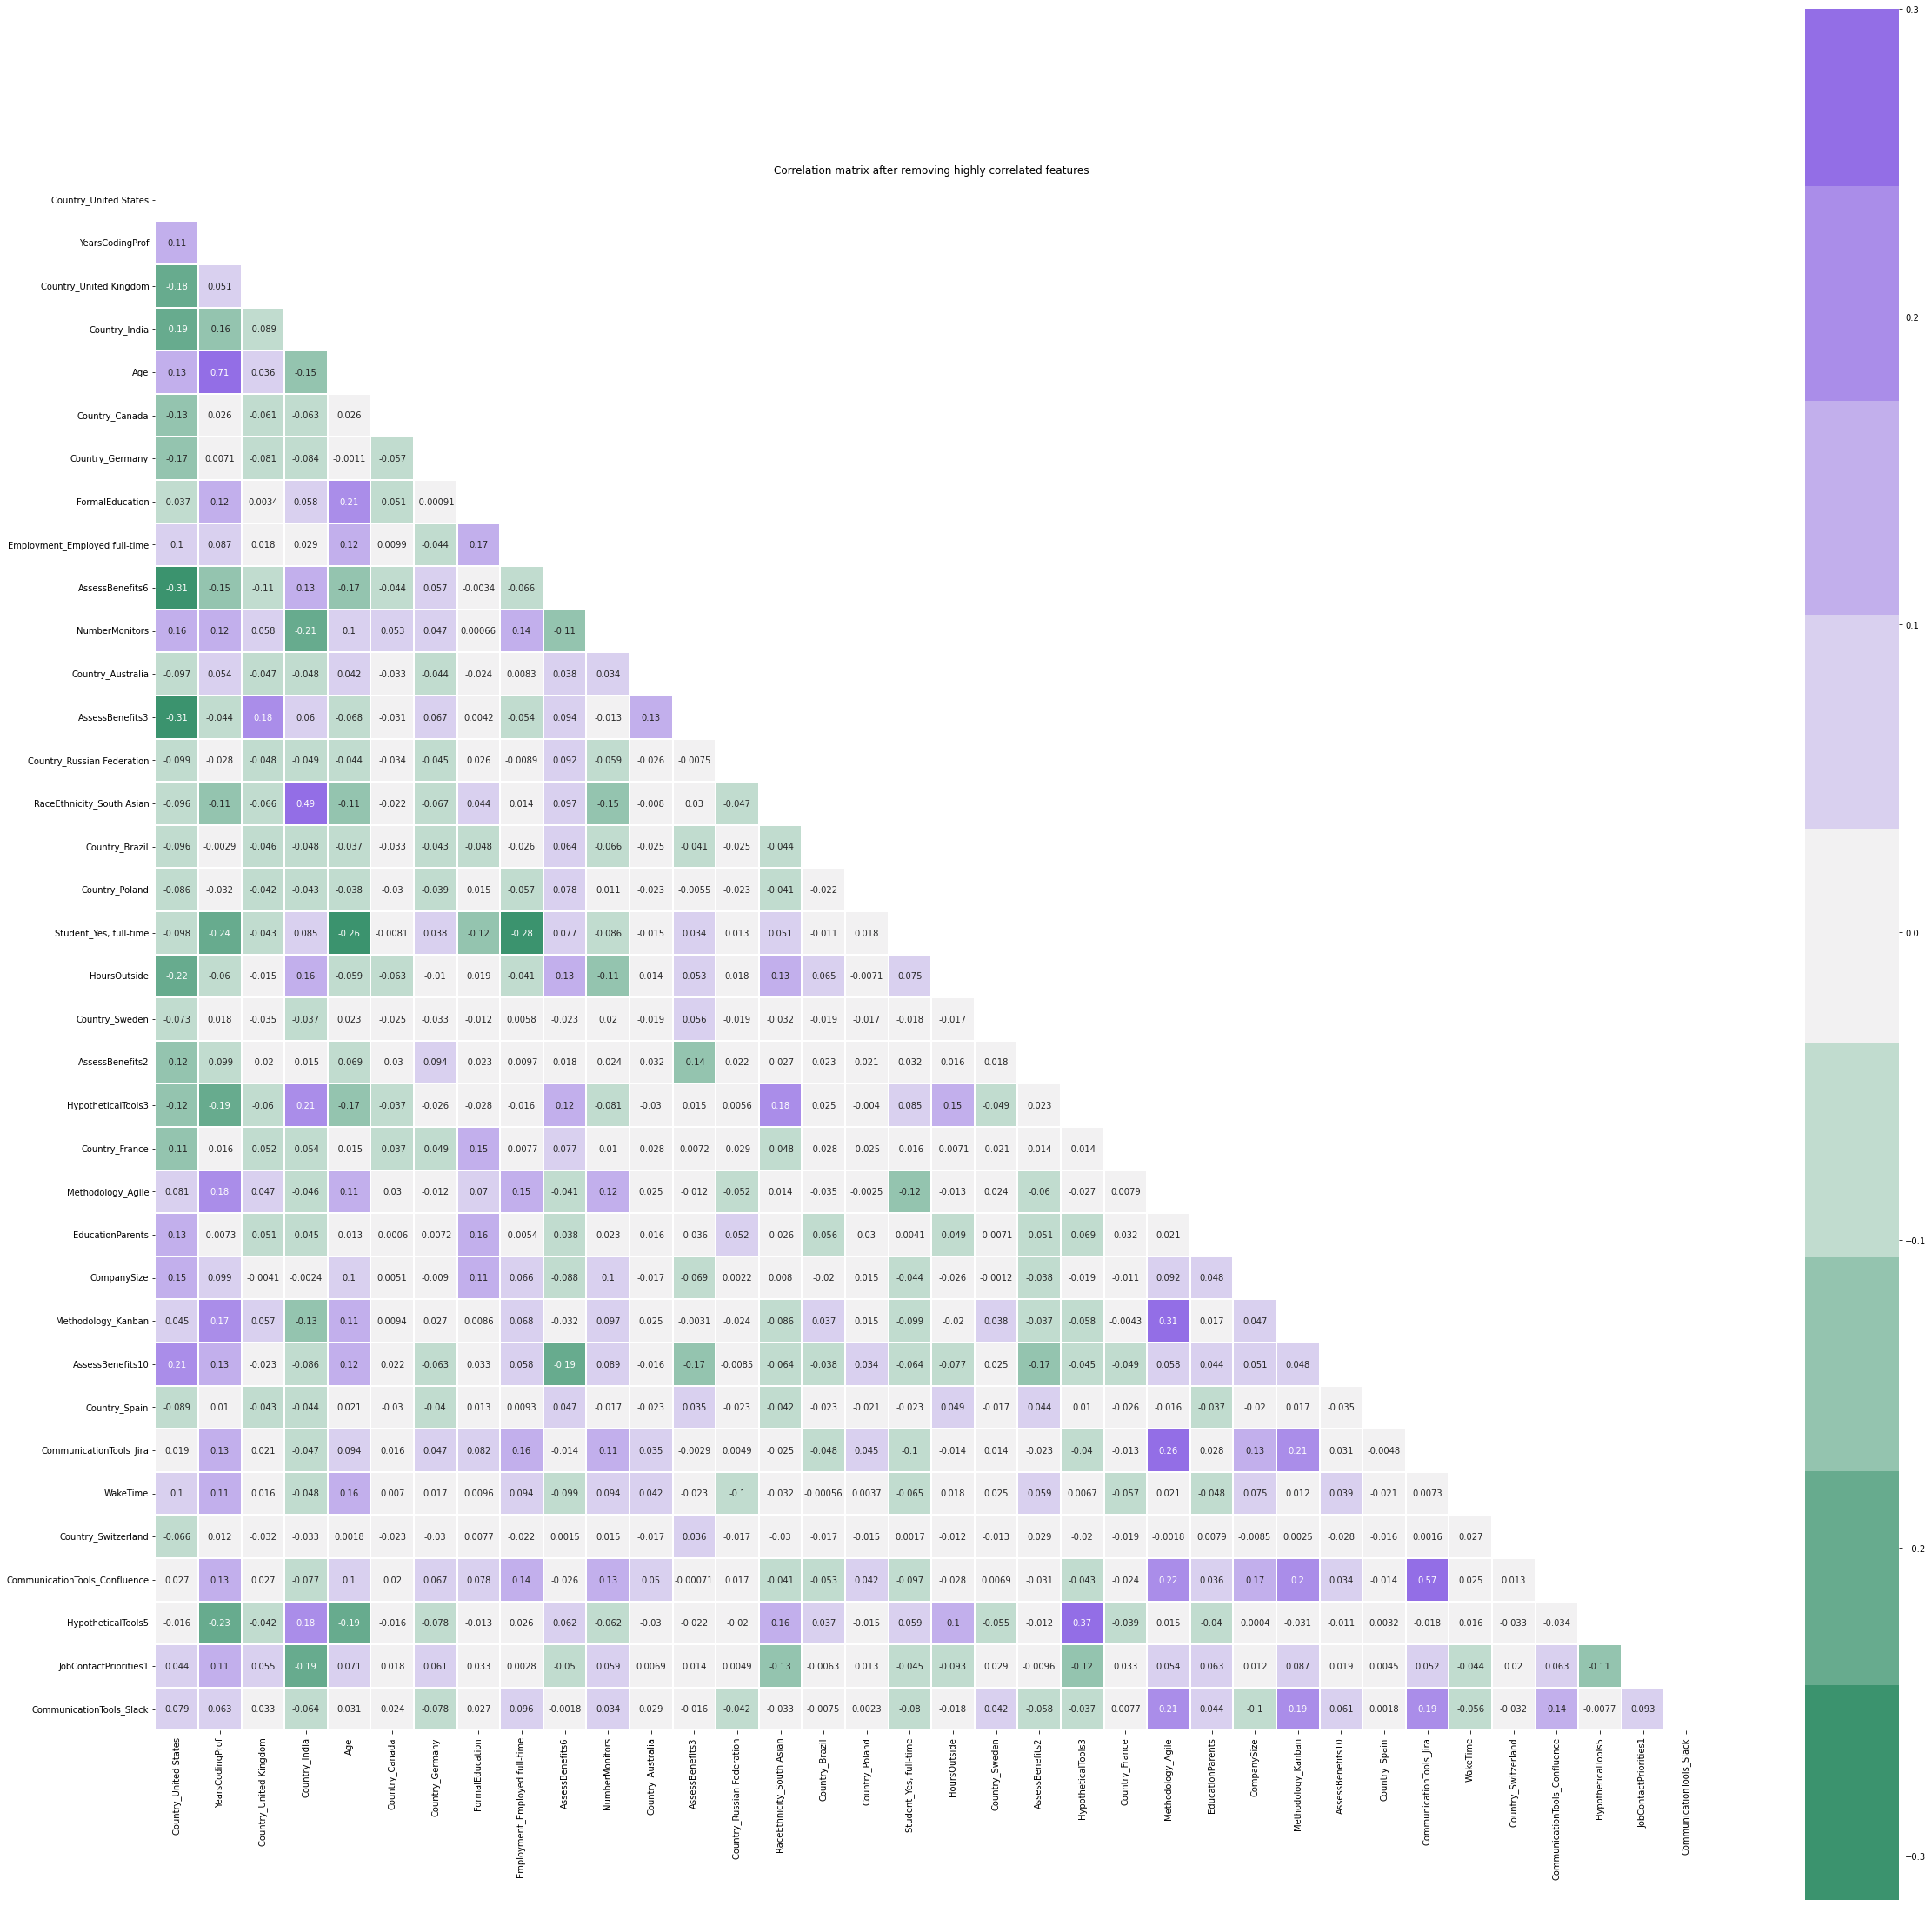

In [135]:
# secilen sütunlarin birbirleri ile olan correlayonu
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
plt.figure(figsize=(40, 40))
corr = X.corr('spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [136]:
cols= list(X.columns)
len(cols)

36

# 7. First Results


In [137]:
#catboost pip install
!pip install catboost

In [138]:
#gerekli kütüphanelerin import edilmesi
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [139]:
# datanin test ve train olarak ayrilmasi ve standardize edilmesi
models=[]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [140]:
models.append(("CatBoost", CatBoostRegressor(verbose = False)))
models.append(("LightGBM", LGBMRegressor()))
models.append(("XGBoost", XGBRegressor(verbose = 0)))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [141]:
# ilk sonuclar
firstResultList=[]
for name, model in models:
        model.fit(X_train, y_train)
        y_pred  = model.predict(X_test)
        rmse    = np.sqrt(mean_squared_error(y_test, y_pred))      
        msg     = "%s-----> %.2f" % (name, rmse)
        firstResultList.append(msg)
        print(msg)

CatBoost-----> 25452.10
LightGBM-----> 25550.45
[07:56:01] WARNING: ../src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost-----> 26096.06
GBM-----> 26108.14
RF-----> 26247.64
KNN-----> 28677.41
SVR-----> 43287.86


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLP-----> 29479.46
CART-----> 38144.51


In [142]:
first_score_df = pd.DataFrame({"First Score":firstResultList})
first_score_df

,First Score
0,CatBoost-----> 25452.10
1,LightGBM-----> 25550.45
2,XGBoost-----> 26096.06
3,GBM-----> 26108.14
4,RF-----> 26247.64
5,KNN-----> 28677.41
6,SVR-----> 43287.86
7,MLP-----> 29479.46
8,CART-----> 38144.51


# 8. Model Tuning

In [143]:
# burada yukaridaki 8 regression Tune edildi

### CatBoost

In [144]:
catb_model = CatBoostRegressor(verbose = False)

In [145]:
catb_params = { "iterations"    : [500,1000,10000],
                "learning_rate" : [0.01,0.1,1],
                "depth"         : [2,6,10]}

In [146]:
#catb_cv_model = GridSearchCV( catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [147]:
#catb_cv_model.best_params_

In [148]:
catb_tuned = CatBoostRegressor( iterations    = 10000,
                                learning_rate = 0.01,
                                depth         = 6 , verbose = False).fit(X_train, y_train)

In [149]:
y_pred = catb_tuned.predict(X_test)
catb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
catb_tuned_score

25437.677323513468

### LightGBM

In [150]:
lgb_model = LGBMRegressor()

In [151]:
lgbm_params = { "learning_rate"   : [0.01, 0.1, 1],
                "n_estimators"    : [200,1000,10000],
                "max_depth"       : [2,5,10],
                "colsample_bytree": [1,0.5,0.3]}

In [152]:
#lgbm_cv_model = GridSearchCV(lgb_model, lgbm_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

In [153]:
#lgbm_cv_model.best_params_

In [154]:
lgbm_tuned = LGBMRegressor( learning_rate=0.01,
                            n_estimators=10000,
                            max_depth=10,
                            colsample_bytree=0.3).fit(X_train, y_train)

In [155]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_tuned_score

25436.422936633262

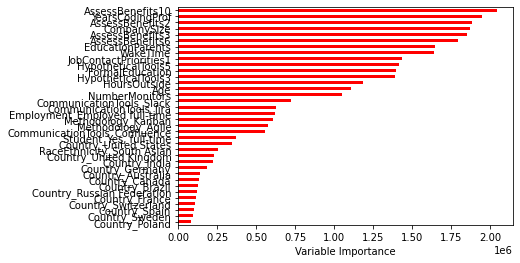

In [156]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = cols)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### XGBoost

In [157]:
xgb_params = {"learning_rate"   : [0.1,0.01,1],
             "max_depth"        : [2,5,8],
             "n_estimators"     : [100,500,1000],
             "colsample_bytree" : [0.3,0.6,1]}

In [158]:
xgb = XGBRegressor()

In [159]:
#xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [160]:
#xgb_cv_model.best_params_

In [161]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.3,
                        learning_rate     = 0.1,
                        max_depth         = 5,
                        n_estimators      = 500).fit(X_train, y_train)

In [162]:
y_pred = xgb_tuned.predict(X_test)
xgb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_tuned_score

25387.115408195896

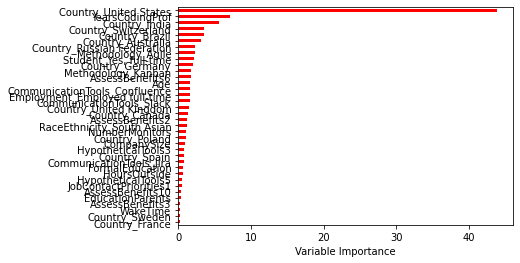

In [163]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### GradientBoostingRegressor

In [164]:
gbm_params = {"learning_rate" : [0.001,0.1,0.01],
              "max_depth"     : [3,5,8],
              "n_estimators"  : [200,500,1000],
              "subsample"     : [1,0.5,0.8] }

In [165]:
gbm_model = GradientBoostingRegressor()

In [166]:
#gbm_cv_model = GridSearchCV(gbm_model,gbm_params, cv = 10, n_jobs=-1, verbose = 2).fit(X_train, y_train)

In [167]:
#gbm_cv_model.best_params_

In [168]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1).fit(X_train, y_train)

In [169]:
y_pred = gbm_tuned.predict(X_test)
gbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_tuned_score

25534.50944475652

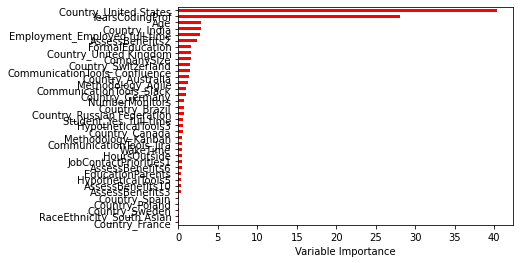

In [170]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = cols)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

### KNeighborsRegressor

In [171]:
knn_params    = {"n_neighbors": np.arange(1,30,1)}
knn_model     = KNeighborsRegressor()
#knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [172]:
#knn_cv_model.best_params_

In [173]:
knn_tuned = KNeighborsRegressor(n_neighbors= 29).fit(X_train, y_train)

In [174]:
y_pred = knn_tuned.predict(X_test)
knn_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
knn_tuned_score

27141.49638367853

### CART

In [175]:
cart_params = { "max_depth"         : [2,3,4,5,6,8,10,20,30,50, 100, 500, 1000,5000,10000],
                "min_samples_split" : [2,5,10,20,30,50,100,500,1000,5000,10000]}

In [176]:
cart_model = DecisionTreeRegressor()

In [177]:
#cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [178]:
#cart_cv_model.best_params_

In [179]:
cart_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=100).fit(X_train, y_train)

In [180]:
y_pred = cart_tuned.predict(X_test)
cart_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
cart_tuned_score

28031.815342815848

### MLPRegressor

In [181]:
mlp = MLPRegressor()

In [182]:
mlp_params = {"alpha"              : [0.1, 0.01, 0.02, 0.001, 0.0001], 
              "hidden_layer_sizes" : [(10,20), (5,5), (100,100), (1000,100,10)]}

In [183]:
#mlp_cv_model = GridSearchCV(mlp, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)

In [184]:
#mlp_cv_model.best_params_

In [185]:
mlp_tuned = MLPRegressor( alpha = 0.02, hidden_layer_sizes  = (1000,100,10)).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [186]:
y_pred = mlp_tuned.predict(X_test)
mlp_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_tuned_score

26513.80927102158

### SVR

In [187]:
#nonlinear
svr_model     = SVR()
svr_params    = {"C": [0.01, 0.1,0.3,0.5,0.8,1,5, 10, 50, 100,500,1000,10000]}
#svr_cv_model  = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)


In [188]:
#svr_cv_model.best_params_

In [189]:
svr_tuned = SVR(C=10000).fit(X_train, y_train)

In [190]:
y_pred          = svr_tuned.predict(X_test)
svr_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
svr_tuned_score

25892.176929123172

#  9. Result

In [191]:
# Tun islemi sonraki toplu olarak sonuclarin yazdirilmasi
index = ["GBM_tuned","XGB_tuned","LGBM_tuned","CATB_tuned","KNN_tuned","CART_tuned","MLP_tuned","SVR_tuned" ]
tuned_score_df = pd.DataFrame({"Tuned Score":[gbm_tuned_score, xgb_tuned_score,
                                              lgbm_tuned_score, catb_tuned_score, 
                                              knn_tuned_score, cart_tuned_score,
                                              mlp_tuned_score, svr_tuned_score]})
tuned_score_df.index = index
tuned_score_df.sort_values(by='Tuned Score')


,Tuned Score
XGB_tuned,25387.12
LGBM_tuned,25436.42
CATB_tuned,25437.68
GBM_tuned,25534.51
SVR_tuned,25892.18
MLP_tuned,26513.81
KNN_tuned,27141.50
CART_tuned,28031.82
